# Importar librerías necesarias

In [1]:
import folium
from folium.plugins import HeatMap
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Analisis dataset homicidios

## <u>Carga del archivo<u>

Puesto que los archivos de excel contienen valores que han sido calculados mediante formulas, se procede a guardar las hojas necesarias en formato csv. <br>
Para poder analizar la información los datos se guarda dataframes correspondientes.

In [2]:
# Carga de cada archivo
df_hechos = pd.read_csv("datasets/hechos.csv")
df_victimas = pd.read_csv("datasets/victimas.csv")

Eliminando filas de datos vacios

In [3]:
# Dataframe de "hechos"
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10493 entries, 0 to 10492
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     696 non-null    object 
 1   N_VICTIMAS             696 non-null    float64
 2   FECHA                  696 non-null    object 
 3   AAAA                   696 non-null    float64
 4   MM                     696 non-null    float64
 5   DD                     696 non-null    float64
 6   HORA                   696 non-null    object 
 7   HH                     696 non-null    object 
 8   LUGAR_DEL_HECHO        696 non-null    object 
 9   TIPO_DE_CALLE          696 non-null    object 
 10  Calle                  695 non-null    object 
 11  Altura                 129 non-null    float64
 12  Cruce                  525 non-null    object 
 13  Dirección Normalizada  688 non-null    object 
 14  COMUNA                 696 non-null    float64
 15  XY

In [4]:
# Eliminar filas donde todas las columnas tienen datos vacíos
df_hechos = df_hechos.dropna(how='all')
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     696 non-null    object 
 1   N_VICTIMAS             696 non-null    float64
 2   FECHA                  696 non-null    object 
 3   AAAA                   696 non-null    float64
 4   MM                     696 non-null    float64
 5   DD                     696 non-null    float64
 6   HORA                   696 non-null    object 
 7   HH                     696 non-null    object 
 8   LUGAR_DEL_HECHO        696 non-null    object 
 9   TIPO_DE_CALLE          696 non-null    object 
 10  Calle                  695 non-null    object 
 11  Altura                 129 non-null    float64
 12  Cruce                  525 non-null    object 
 13  Dirección Normalizada  688 non-null    object 
 14  COMUNA                 696 non-null    float64
 15  XY (CABA)  

In [5]:
# Dataframe de "victimas"
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_hecho             717 non-null    object 
 1   FECHA                717 non-null    object 
 2   AAAA                 717 non-null    float64
 3   MM                   717 non-null    float64
 4   DD                   717 non-null    float64
 5   ROL                  717 non-null    object 
 6   VICTIMA              717 non-null    object 
 7   SEXO                 717 non-null    object 
 8   EDAD                 717 non-null    object 
 9   FECHA_FALLECIMIENTO  717 non-null    object 
dtypes: float64(3), object(7)
memory usage: 56.4+ KB


In [6]:
# Eliminar filas donde todas las columnas tienen datos vacíos
df_victimas = df_victimas.dropna(how='all')
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_hecho             717 non-null    object 
 1   FECHA                717 non-null    object 
 2   AAAA                 717 non-null    float64
 3   MM                   717 non-null    float64
 4   DD                   717 non-null    float64
 5   ROL                  717 non-null    object 
 6   VICTIMA              717 non-null    object 
 7   SEXO                 717 non-null    object 
 8   EDAD                 717 non-null    object 
 9   FECHA_FALLECIMIENTO  717 non-null    object 
dtypes: float64(3), object(7)
memory usage: 61.6+ KB


Buscando duplicados en todas las columnas

In [7]:
# Para el dataframe "hechos"
df_hechos.duplicated().sum()

0

In [8]:
# Para el dataframe "victimas"
df_victimas.duplicated().sum()

0

## <u>Transformaciones<u>

### Dataframe "hechos"

In [9]:
# Convertir las columnas 'AÑO' y 'MES' a tipo entero
df_hechos['AAAA'] = df_hechos['AAAA'].astype(int)
df_hechos['MM'] = df_hechos['MM'].astype(int)

In [10]:
# Convertir la columna 'FECHA' a tipo datetime si aún no lo está
df_hechos['FECHA'] = pd.to_datetime(df_hechos['FECHA'])

In [11]:
# Reemplazar "SD" con NaN
df_hechos['HH'] = df_hechos['HH'].replace('SD', pd.NA)
# Convertir la Hora a tipo numérico
df_hechos['HH'] = pd.to_numeric(df_hechos['HH'], downcast='integer', errors='coerce')

In [12]:
# Convertir el número de victimas en tipo entero
df_hechos["N_VICTIMAS"] = df_hechos["N_VICTIMAS"].astype(int)

In [13]:
# Filtrar filas con posiciones no válidas
valid_positions = ~(df_hechos['pos x'].str.contains('[^0-9.,-]') | df_hechos['pos y'].str.contains('[^0-9.,-]') | (df_hechos['pos x'] == '.') | (df_hechos['pos y'] == '.'))

# Establecer posiciones no válidas en NaN
df_hechos.loc[~valid_positions, ['pos x', 'pos y']] = np.nan

# Convertir las cadenas a tipo numérico (float)
df_hechos['pos x'] = df_hechos['pos x'].str.replace(',', '.').astype(float)
df_hechos['pos y'] = df_hechos['pos y'].str.replace(',', '.').astype(float)

## <u>EDA de hechos<u>

### *Resumen estadístico de la cantidad de victimas*

In [14]:
df_hechos["N_VICTIMAS"].describe()

count    696.000000
mean       1.030172
std        0.179393
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: N_VICTIMAS, dtype: float64

Debido a que existe una baja variabilidad en el número de víctimas, y que más del 75% de simiestros muestran que el promedio de victimas es uno, se procede a graficar la distribución del número de victimas por siniestro.

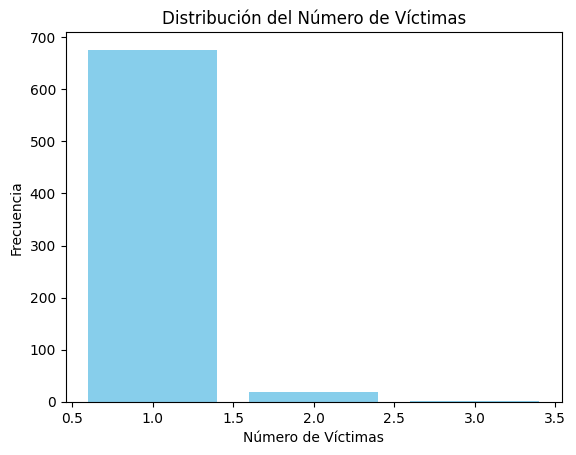

In [15]:
conteo_victimas = df_hechos['N_VICTIMAS'].value_counts().sort_index()

# Preparar los datos para el gráfico de barras
valores = conteo_victimas.index
frecuencias = conteo_victimas.values

# Crear el gráfico de barras
plt.bar(valores, frecuencias, color='skyblue')

# Añadir títulos y etiquetas
plt.title('Distribución del Número de Víctimas')
plt.xlabel('Número de Víctimas')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [16]:
# Cantidad de de victimas por siniestro
conteo_victimas

N_VICTIMAS
1    676
2     19
3      1
Name: count, dtype: int64

    - La mayoría de los siniestros viales involucran a una sola víctima. Esto indica que la gran mayoría de los incidentes tienen un impacto limitado en términos de víctimas.
    - Un número mucho más pequeño de siniestros viales (3% aproximadamente) involucra a dos víctimas. Aunque menos comunes que los incidentes con una sola víctima, estos casos aún representan una proporción significativa.
    - En raras ocasiones, un siniestro vial resulta en tres víctimas. Estos casos son poco frecuentes pero merecen una atención especial debido a su mayor gravedad y complejidad.
    Estos hallazgos pueden ser útiles para comprender la gravedad y la complejidad de los incidents, los cuales pueden ser complementados con los análisis posteriores. 


### *Análisis temporal de número de victimas*

Se realiza un análisis temporal ya que nos permite observar tendencias y patrones a lo largo del tiempo en relación con los siniestros viales y la cantidad de víctimas involucradas.

In [17]:
# Agrupar por año y mes, y sumar el número de víctimas
analisis_temporal = df_hechos.groupby(['AAAA', 'MM'])['N_VICTIMAS'].sum().reset_index()

In [18]:
# Combinar AÑO y MES para obtener una sola variable de tiempo
analisis_temporal['FECHA'] = analisis_temporal['AAAA'].astype(str) + '-' + analisis_temporal['MM'].astype(str)

# Convertir la variable de tiempo a formato datetime
analisis_temporal['FECHA'] = pd.to_datetime(analisis_temporal['FECHA'])

# Ordenar el DataFrame por fecha
analisis_temporal = analisis_temporal.sort_values('FECHA')

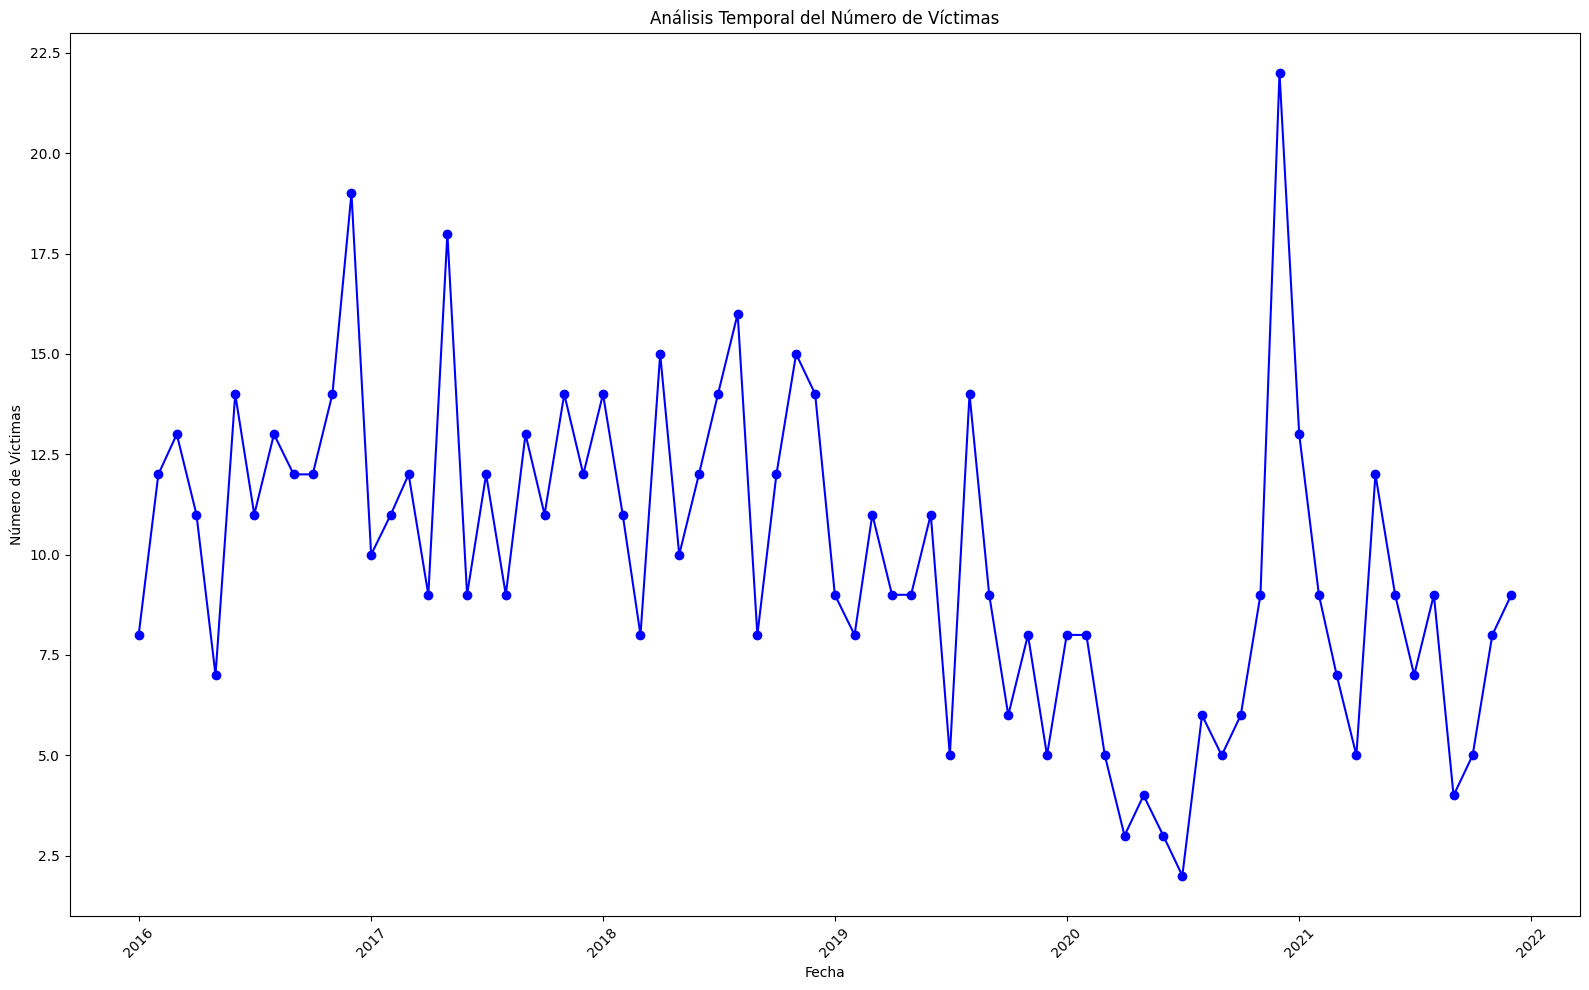

In [19]:
# Crear el gráfico de líneas
plt.figure(figsize=(16, 10))
plt.plot(analisis_temporal['FECHA'], analisis_temporal['N_VICTIMAS'], marker='o', color='b')

# Añadir títulos y etiquetas
plt.title('Análisis Temporal del Número de Víctimas')
plt.xlabel('Fecha')
plt.ylabel('Número de Víctimas')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

    Si bien existe mucha variación de la cantidad de victimas en los meses de cada año, hay patrones importantes que nos muestra el gráfico:
    - A inicios y finales de año existe un aumento en la cantidad de victimas.
    - En el período de 2016 al 2018 hay poca variación en la cantidad de victimas, por lo que se podría considerar como un período estacionario, lo que nos indica que los trabajos de prevención de siniestros están teniendo un efecto en la población.
    - En el período de 2018 al 2020 hay una tendencia bajista, es decir, hay una disminución en la cantidad de victimas, lo que nos indica que las medidas de prevención de siniestros están siendo adoptadas por la población. 
    - La gran disminución que existe en el año 2020 durante enero a juniose debe a la pandemia mundial, sin embargo, este período ayuda a corroborar lo mencionado en el primer punto.
    - A pesar de haber un aumento de la cantidad de victimas en el año 2021, estos siguen siendo menores a los del año 2019, lo que implica que las medidas de prevención aun siguen siendo efectivas.


### *Distribución del número de victimas*

#### Por Año

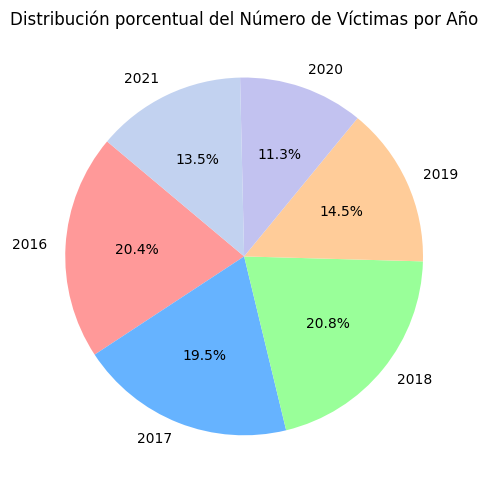

In [20]:
# Distribución porcentual del número de víctimas por año
# Calcular el total de víctimas por año
total_victimas_por_año = df_hechos.groupby('AAAA')['N_VICTIMAS'].sum()

# Crear el gráfico tipo torta
plt.figure(figsize=(5, 5))
plt.pie(total_victimas_por_año, labels=total_victimas_por_año.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0', '#c2d2f0'])

# Añadir título
plt.title('Distribución porcentual del Número de Víctimas por Año')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

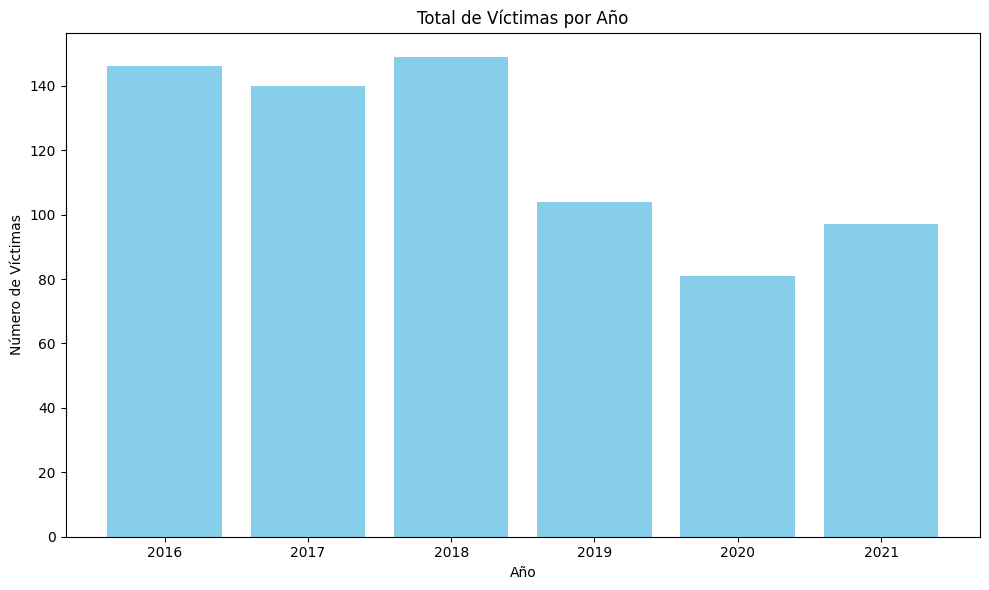

In [21]:
# Calcular el total de víctimas por año
total_victimas_por_año = df_hechos.groupby('AAAA')['N_VICTIMAS'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(total_victimas_por_año.index, total_victimas_por_año.values, color='skyblue')

# Añadir títulos y etiquetas
plt.title('Total de Víctimas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Víctimas')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

    Los gráficos de distribución por año nos permiten complementar el análisis temporal realizado, lo cual a su vez nos ayuda a corroborar el análisis realizado sobre el período estacionario (2016-2018) y la disminución en la cantidad de victimas conforme pasan los años (2018-2021). 

#### Por Mes

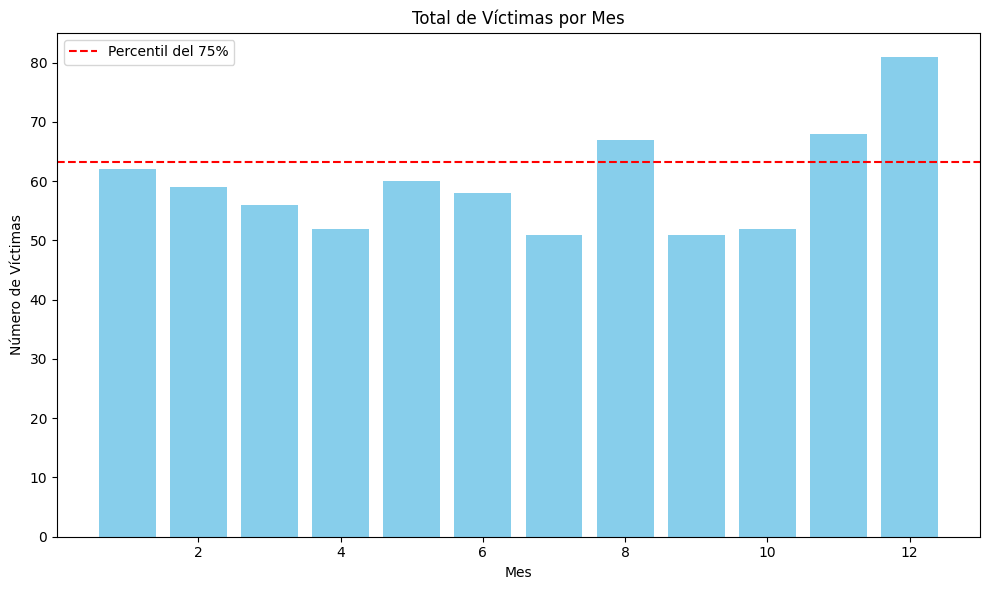

In [22]:
# Calcular el total de víctimas por mes
total_victimas_por_mes = df_hechos.groupby('MM')['N_VICTIMAS'].sum()

# Calcular el percentil del 75%
percentil_75 = total_victimas_por_mes.quantile(0.75)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(total_victimas_por_mes.index, total_victimas_por_mes.values, color='skyblue')

# Añadir la línea horizontal para la mediana del 75%
plt.axhline(y=percentil_75, color='red', linestyle='--', label='Percentil del 75%')

# Añadir títulos y etiquetas
plt.title('Total de Víctimas por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Víctimas')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

    Este gráfico nos permite complementar el análisis temporal, ya que nos permite corroborar que a inicios y finales de cada año existe un aumento en el número de victimas.

#### Por Día de la semana

In [23]:
# Obtener el día de la semana (0=Monday, 1=Tuesday, ..., 6=Sunday)
df_hechos['DIA_SEMANA'] = df_hechos['FECHA'].dt.dayofweek

# Calcular el total de víctimas por día de la semana
total_victimas_por_dia = df_hechos.groupby('DIA_SEMANA')['N_VICTIMAS'].sum()

# Definir nombres de los días de la semana
nombres_dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']


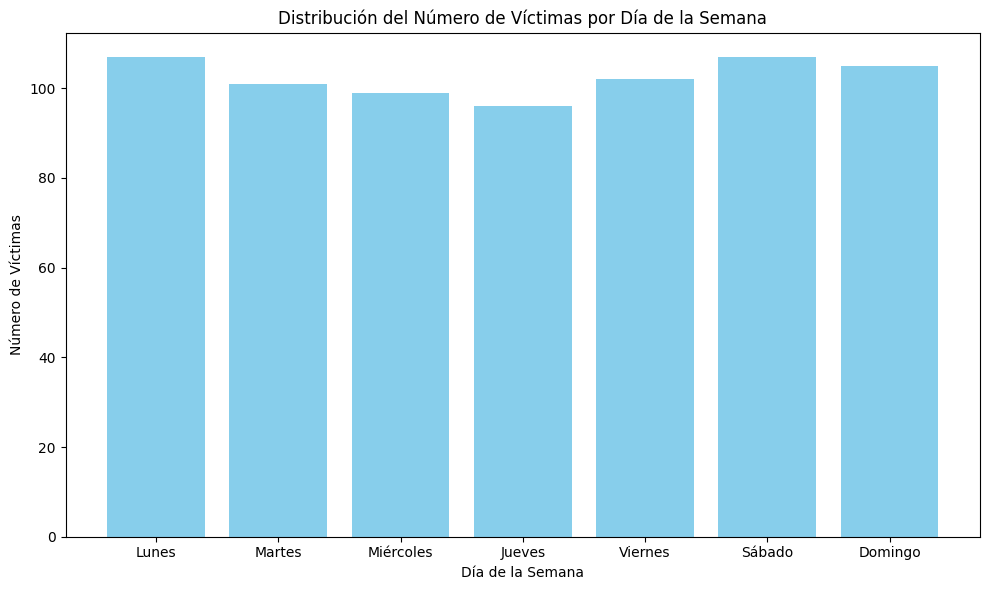

In [24]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(nombres_dias_semana, total_victimas_por_dia, color='skyblue')

# Añadir títulos y etiquetas
plt.title('Distribución del Número de Víctimas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Víctimas')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### Por Hora

In [25]:
# Calcular el total de víctimas por Hora
total_victimas_por_hora = df_hechos.groupby('HH')['N_VICTIMAS'].sum()

In [26]:
total_victimas_por_hora.describe()

count    24.000000
mean     29.833333
std       6.349712
min      17.000000
25%      26.000000
50%      30.000000
75%      32.250000
max      43.000000
Name: N_VICTIMAS, dtype: float64

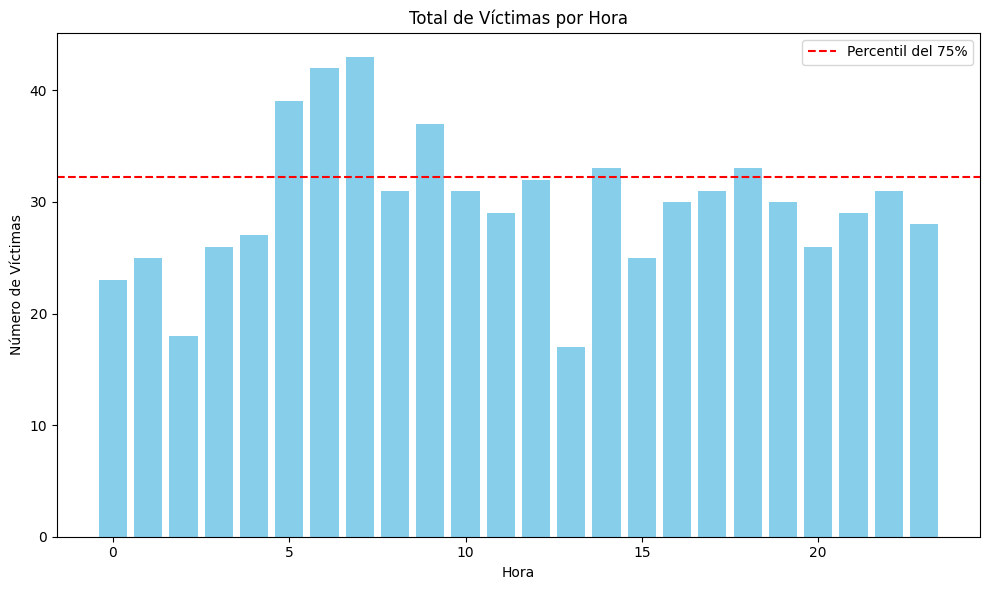

In [27]:
# Calcular el percentil del 75%
percentil_75 = total_victimas_por_hora.quantile(0.75)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(total_victimas_por_hora.index, total_victimas_por_hora.values, color='skyblue')

# Añadir la línea horizontal para la mediana del 75%
plt.axhline(y=percentil_75, color='red', linestyle='--', label='Percentil del 75%')

# Añadir títulos y etiquetas
plt.title('Total de Víctimas por Hora')
plt.xlabel('Hora')
plt.ylabel('Número de Víctimas')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### Por Día de la Semana y Hora del Día

In [28]:
# Crear una columna 'NOMBRE_DIA' a partir de 'DIA_SEMANA'
df_hechos['NOMBRE_DIA_SEMANA'] = df_hechos['DIA_SEMANA'].map({0: '1.Lunes', 1: '2.Martes', 2: '3.Miércoles', 3: '4.Jueves', 4: '5.Viernes', 5: '6.Sábado', 6: '7.Domingo'})

In [29]:
df_victimas_semana = df_hechos[["NOMBRE_DIA_SEMANA", "HH", "N_VICTIMAS"]].copy()
df_victimas_semana["N_VICTIMAS"] = df_victimas_semana["N_VICTIMAS"].astype(int)

df_victimas_semana = df_victimas_semana.dropna(subset=['HH'])
df_victimas_semana["HH"] = df_victimas_semana["HH"].astype(int)

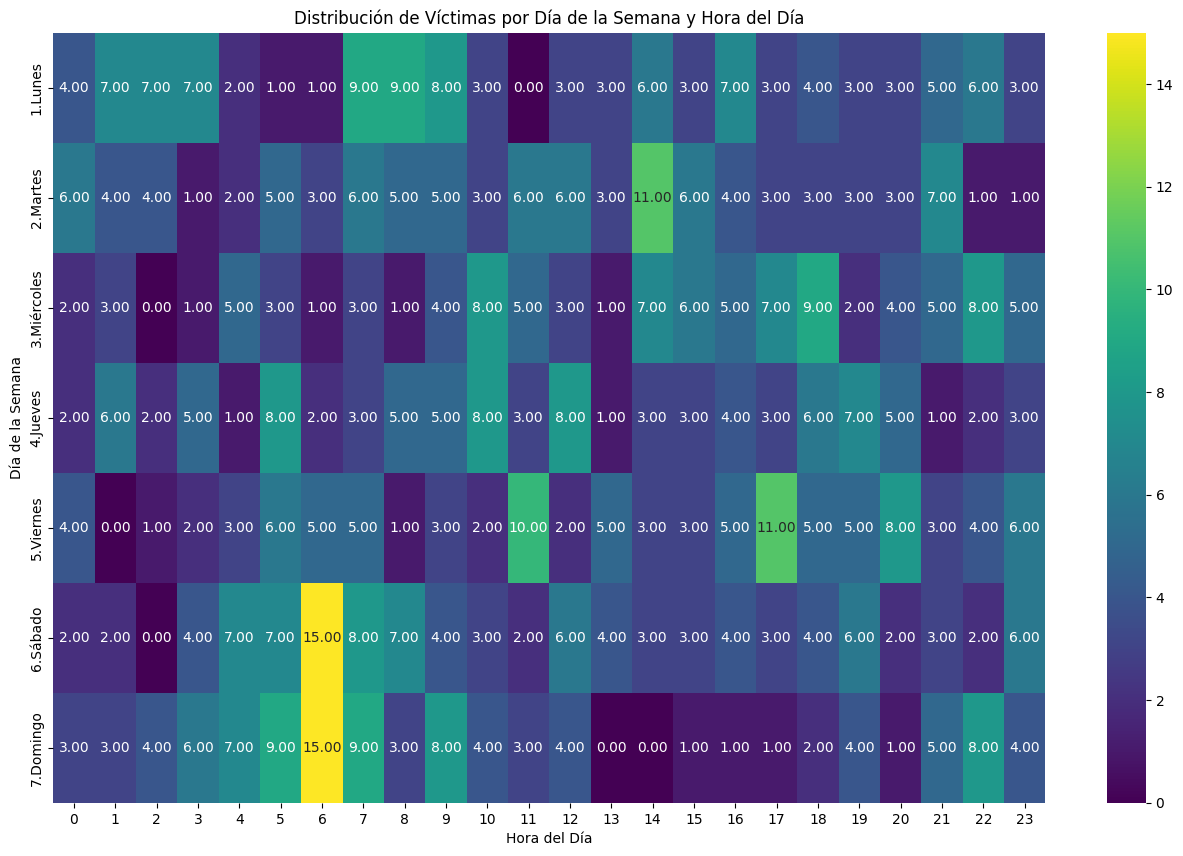

In [30]:
# Crear una tabla pivote para contar el número de víctimas por día de la semana y hora del día
tabla_pivote = df_victimas_semana.pivot_table(index='NOMBRE_DIA_SEMANA', columns='HH', values='N_VICTIMAS', aggfunc='sum', fill_value=0)

# Crear un heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(tabla_pivote, cmap='viridis', annot=True, fmt='.2f')
plt.title('Distribución de Víctimas por Día de la Semana y Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Día de la Semana')
plt.show()

    Después de análizar los gráficos de la distribución del número de victimas por "día de la semana", por "hora" y "día y hora", se llega a las siguientes conclusiones:
    - Los momentos más críticos a tomar en cuentan son los horarios de ir al trabajo (5-9 h), de almuerzo (12-14 h), y de salida del trabajo (17-18 h).
    - La baja cantidad de victimas en la madrugada, sugiere que hay menor número de victimas con casos producidos por presencia de alcohol.
    - Los fines de semana, a pesar de ser pocos días y tener pocos casos, ocurren incidentes que contienen bastantes numeros de victimas.

### *Distribución Espacial de Siniestros*

Un mapa de calor permitirá visualizar de manera efectiva dónde se concentran los siniestros viales en la ciudad. Esto puede ayudar a identificar áreas de alto riesgo y focalizar los esfuerzos de prevención. <br>
* Dado que las columnas "pos x", "pos y", "Dirección Normalizada" proporcionan información espacial relevante, son las más adecuadas para generar un mapa de calor que visualice la distribución de los siniestros viales en la Ciudad de Buenos Aires.
* Para la creación del mapa de calor se utiliza la libreria "folium", ya que permite crear mapas interactivos basados en Leaflet.js, lo que significa que los mapas pueden ser explorados, zoomados y panned por los usuarios.

Creando un dataframe temporal para el mapa de calor

In [31]:
# Creando un dataframe para la distribución
dataframe_mapa = df_hechos[["pos x", "pos y", "Dirección Normalizada"]].copy()

# Eliminando valores nulos
dataframe_mapa = dataframe_mapa.dropna(subset=['pos x', 'pos y'])

Creación del mapa de calor

In [32]:
# Crear un mapa centrado en Buenos Aires
mapa = folium.Map(location=[-34.613151, -58.377231], zoom_start=12)

# Crear una capa de calor basada en las coordenadas (pos x, pos y)
heat_data = [[row['pos y'], row['pos x']] for index, row in dataframe_mapa.iterrows()]
HeatMap(heat_data).add_to(mapa)

# Añadir marcadores para las Dirección Normalizadas
for index, row in dataframe_mapa.iterrows():
    if not pd.isnull(row['Dirección Normalizada']):
        folium.Marker([row['pos y'], row['pos x']], popup=row['Dirección Normalizada']).add_to(mapa)

# Guardar el mapa como un archivo HTML
mapa.save('assets/mapa_calor_siniestros.html')

    El mapa de calor se puede visualizar en el navegador de manera interactiva.
    El archivo se encuentra dentro de la carpeta "assets", con el nombre de "mapa_calor_siniestros.html"

    A continuación, se muestra una imagen referencial:

![Mapa de calor de siniestros](assets/mapa_de_calor_siniestros.png)

Para mayor entendimiento sobre la distribución espacial de los siniestros se procede a realizar una distribución de la cantidad de victimas por comuna.

#### Distribución por Comuna

In [33]:
# Calcular el total de víctimas por Hora
total_victimas_por_comuna = df_hechos.groupby('COMUNA')['N_VICTIMAS'].sum()

In [34]:
total_victimas_por_comuna.describe()

count    16.000000
mean     44.812500
std      24.405515
min       2.000000
25%      28.750000
50%      39.500000
75%      63.250000
max      93.000000
Name: N_VICTIMAS, dtype: float64

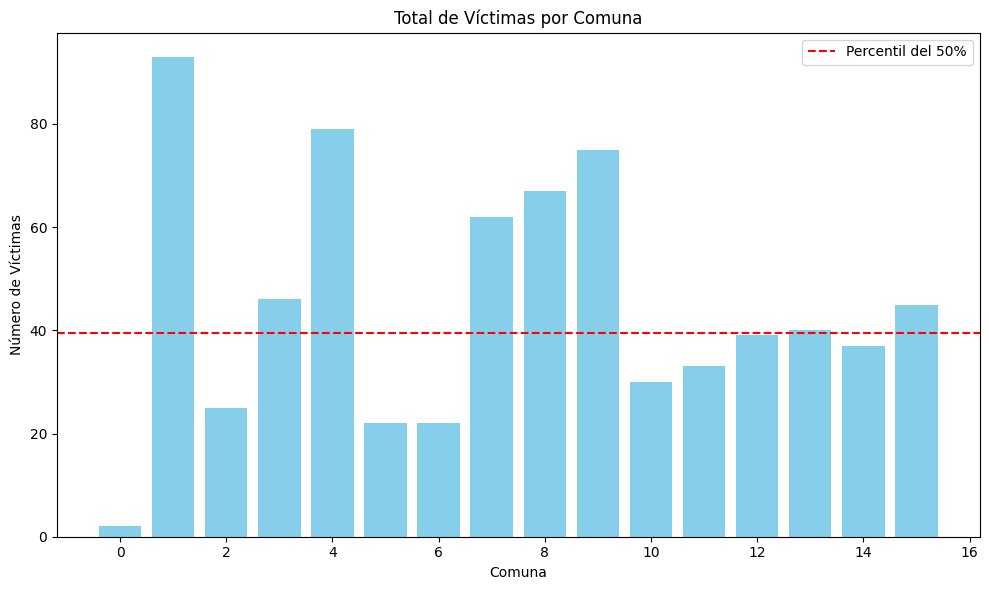

In [35]:
percentil_50 = total_victimas_por_comuna.quantile(0.5)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(total_victimas_por_comuna.index, total_victimas_por_comuna.values, color='skyblue')

# Añadir la línea horizontal para la mediana del 75%
plt.axhline(y=percentil_50, color='red', linestyle='--', label='Percentil del 50%')

# Añadir títulos y etiquetas
plt.title('Total de Víctimas por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Número de Víctimas')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

    La mayor cantidad de siniestros se produce en las comunas 1, 4, 7, 8 y 9. 
    Esto sugiere que puede haber algunos factores que contribuyen al elevado número de víctimas en algunas comunas, como las malas condiciones de las carreteras, el alto volumen de tráfico o la conducción imprudente. Puesto que, como se analizó previamente, el mayor número de victimas se produce en horarios donde se involucra el trabajo de los ciudadanos (entrada-almuerzo-salida).

### *Distribución temporal de Siniestros por ubicación*

In [36]:
# Calcular el total de víctimas por'COMUNA' y 'AÑO'
df_victimas_anio_comuna = df_hechos.groupby(['AAAA', 'COMUNA'])['N_VICTIMAS'].sum().reset_index()

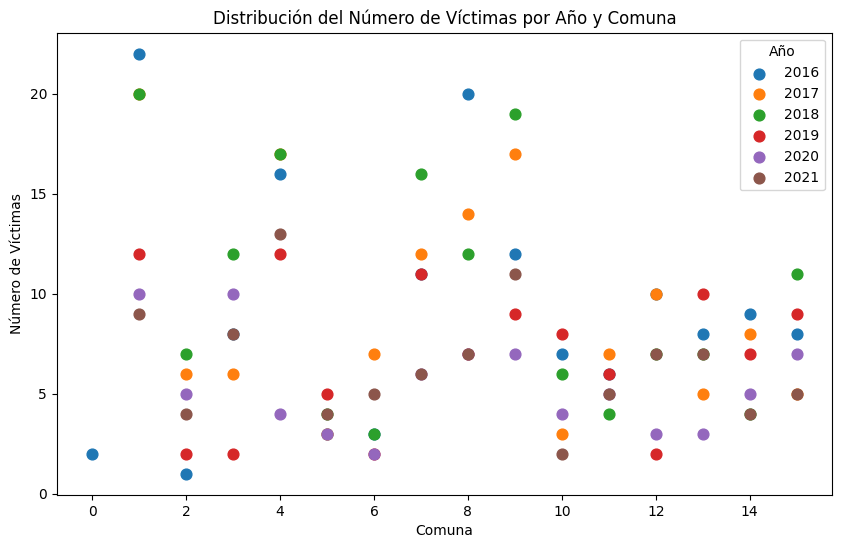

In [37]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
for año, grupo in df_victimas_anio_comuna.groupby('AAAA'):
    plt.scatter(grupo['COMUNA'], grupo['N_VICTIMAS'], label=str(año), s=60)

plt.xlabel('Comuna')
plt.ylabel('Número de Víctimas')
plt.legend(title='Año')
plt.title('Distribución del Número de Víctimas por Año y Comuna')
plt.show()


    La conclusión que se puede extraer de la distribución presentada es que al existir una gran variación en el número de víctimas de accidentes de tráfico en diferentes comunas a lo largo de los años, sugiere que pueden haber algunos factores, como las malas condiciones de las carreteras, el alto volumen de tráfico o la conducción imprudente. Sin embargo, también es posible que el número de víctimas en algunas comunas haya variado con el tiempo debido a cambios en otros factores, como la implementación de medidas de seguridad o cambios en los hábitos de conducción.

### *Distribución de acusados*

Porcentaje de cantidad siniestros ocasionados por cada tipo de acusado

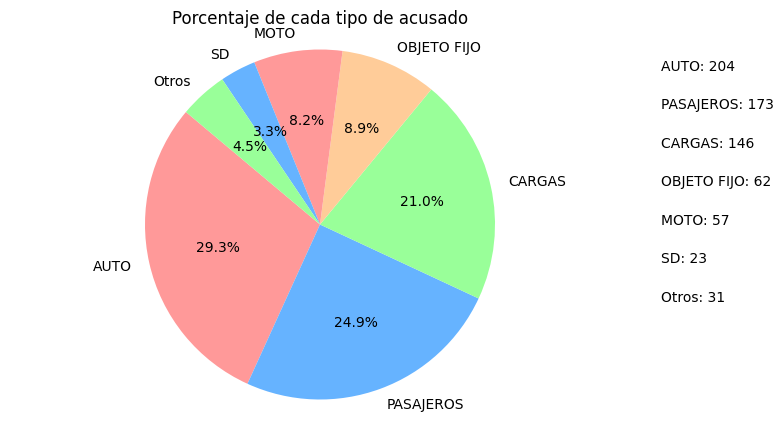

In [147]:
# Calcular el conteo de cada tipo de acusado
conteo_acusados = df_hechos['ACUSADO'].value_counts()

# Filtrar las categorías menos frecuentes
umbral = 20  # Define un umbral para agrupar categorías menos frecuentes
categorias_frecuentes = conteo_acusados[conteo_acusados >= umbral]
categorias_menos_frecuentes = conteo_acusados[conteo_acusados < umbral]

# Crear una nueva categoría 'Otros' para las menos frecuentes
otros = categorias_menos_frecuentes.sum()
categorias_frecuentes['Otros'] = otros

# Crear el gráfico de pastel
plt.figure(figsize=(8, 5))
plt.pie(categorias_frecuentes, labels=categorias_frecuentes.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Porcentaje de cada tipo de acusado')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Agregar etiquetas fuera del gráfico
for i, (categoria, valor) in enumerate(categorias_frecuentes.items()):
    plt.text(1.05, 0.9-i*0.1, f'{categoria}: {valor}', fontsize=10, transform=plt.gca().transAxes)

plt.show()

Cantidad de victimas por siniestros provocado por cada tipo de acusado

In [65]:
# Calcular el tipo de acusado por número de victimas
acusado_por_n_victimas = df_hechos.groupby('ACUSADO')['N_VICTIMAS'].sum()

In [66]:
acusado_por_n_victimas.describe()

count     10.000000
mean      71.700000
std       78.621527
min        1.000000
25%        9.500000
50%       40.500000
75%      129.250000
max      210.000000
Name: N_VICTIMAS, dtype: float64

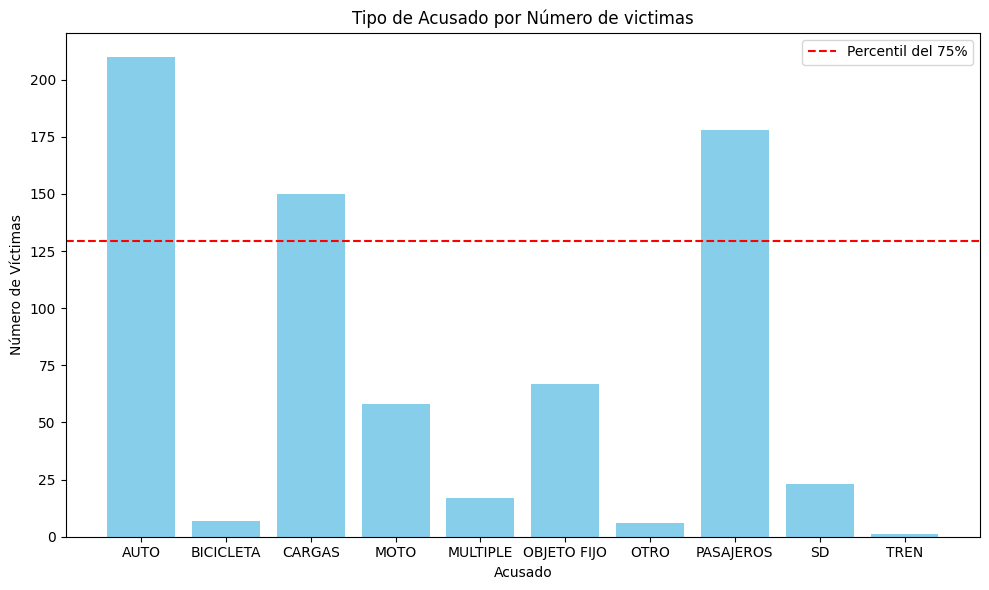

In [149]:
# Calcular el percentil del 75%
percentil_75 = acusado_por_n_victimas.quantile(0.75)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(acusado_por_n_victimas.index, acusado_por_n_victimas.values, color='skyblue')

# Añadir la línea horizontal para el percentil del 75%
plt.axhline(y=percentil_75, color='red', linestyle='--', label='Percentil del 75%')

# Añadir títulos y etiquetas
plt.title('Tipo de Acusado por Número de victimas')
plt.xlabel('Acusado')
plt.ylabel('Número de Víctimas')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

    Los gráficos de distribución por tipo de acuasado nos permite visualizar cuales son los aquellos que causan más victimas por los siniestros ocasionados en las vías, los cuales en este caso son los autos, cargas y pasajeros.

### *Análisis temporal de los acusados por cantidad de siniestros*

Debido a que los acusados más recurrentes son autos, motos, cargas, objetos fijos y pasajeros, el gráfico se realiará con estos valores, puesto que son los más relevantes.

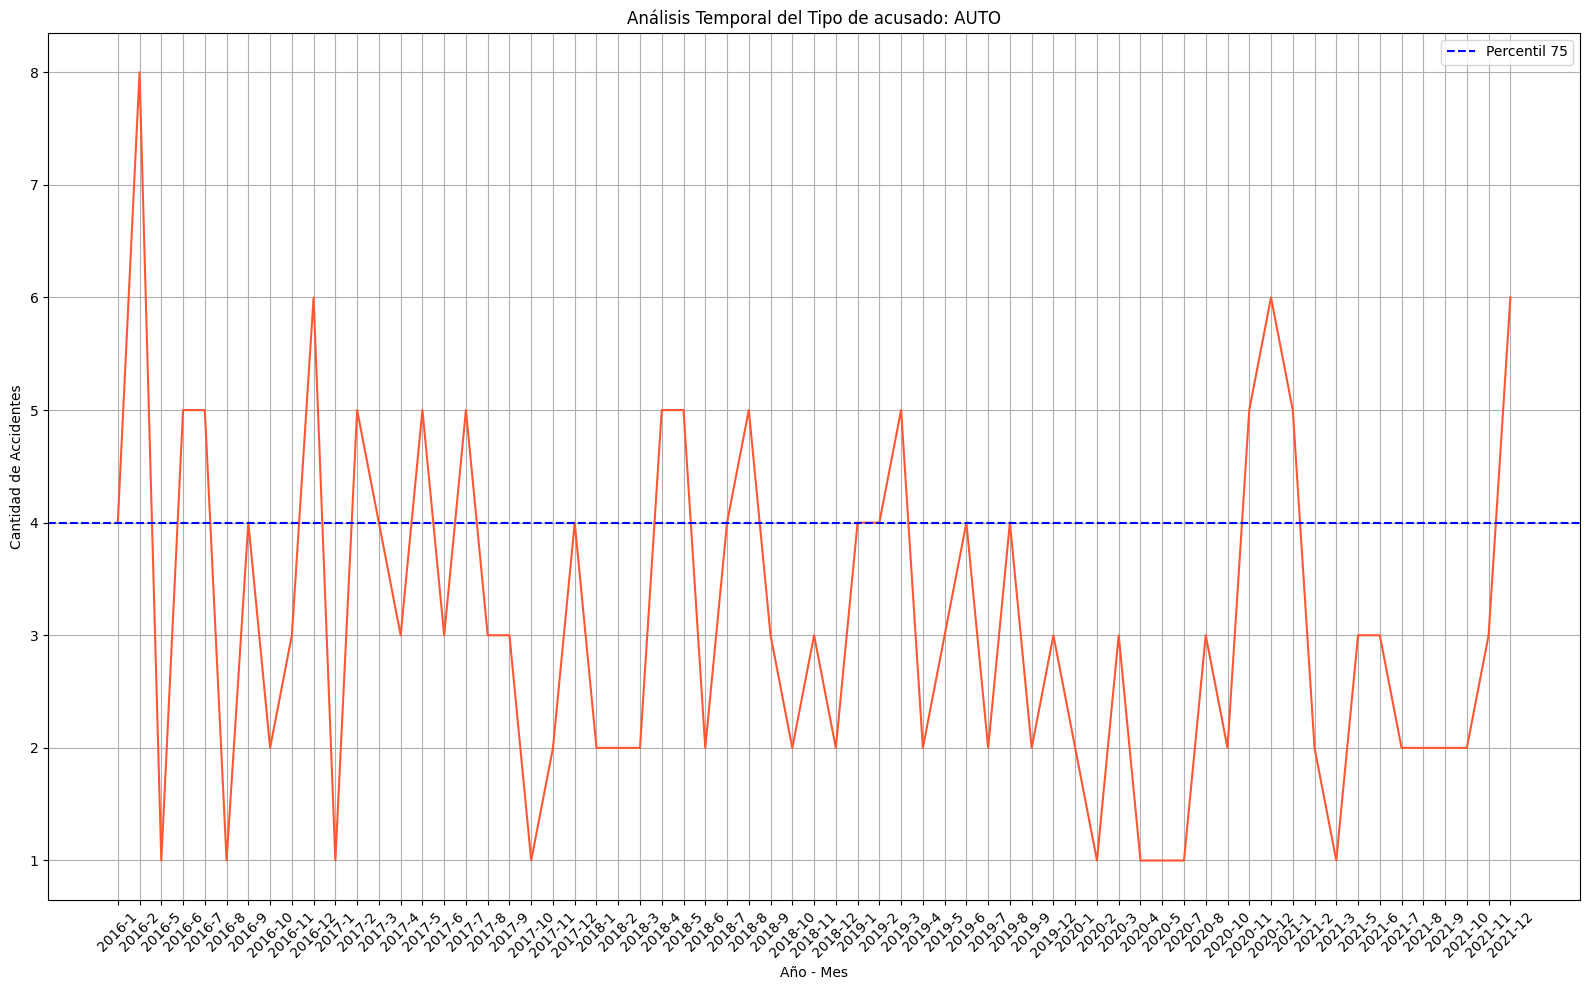

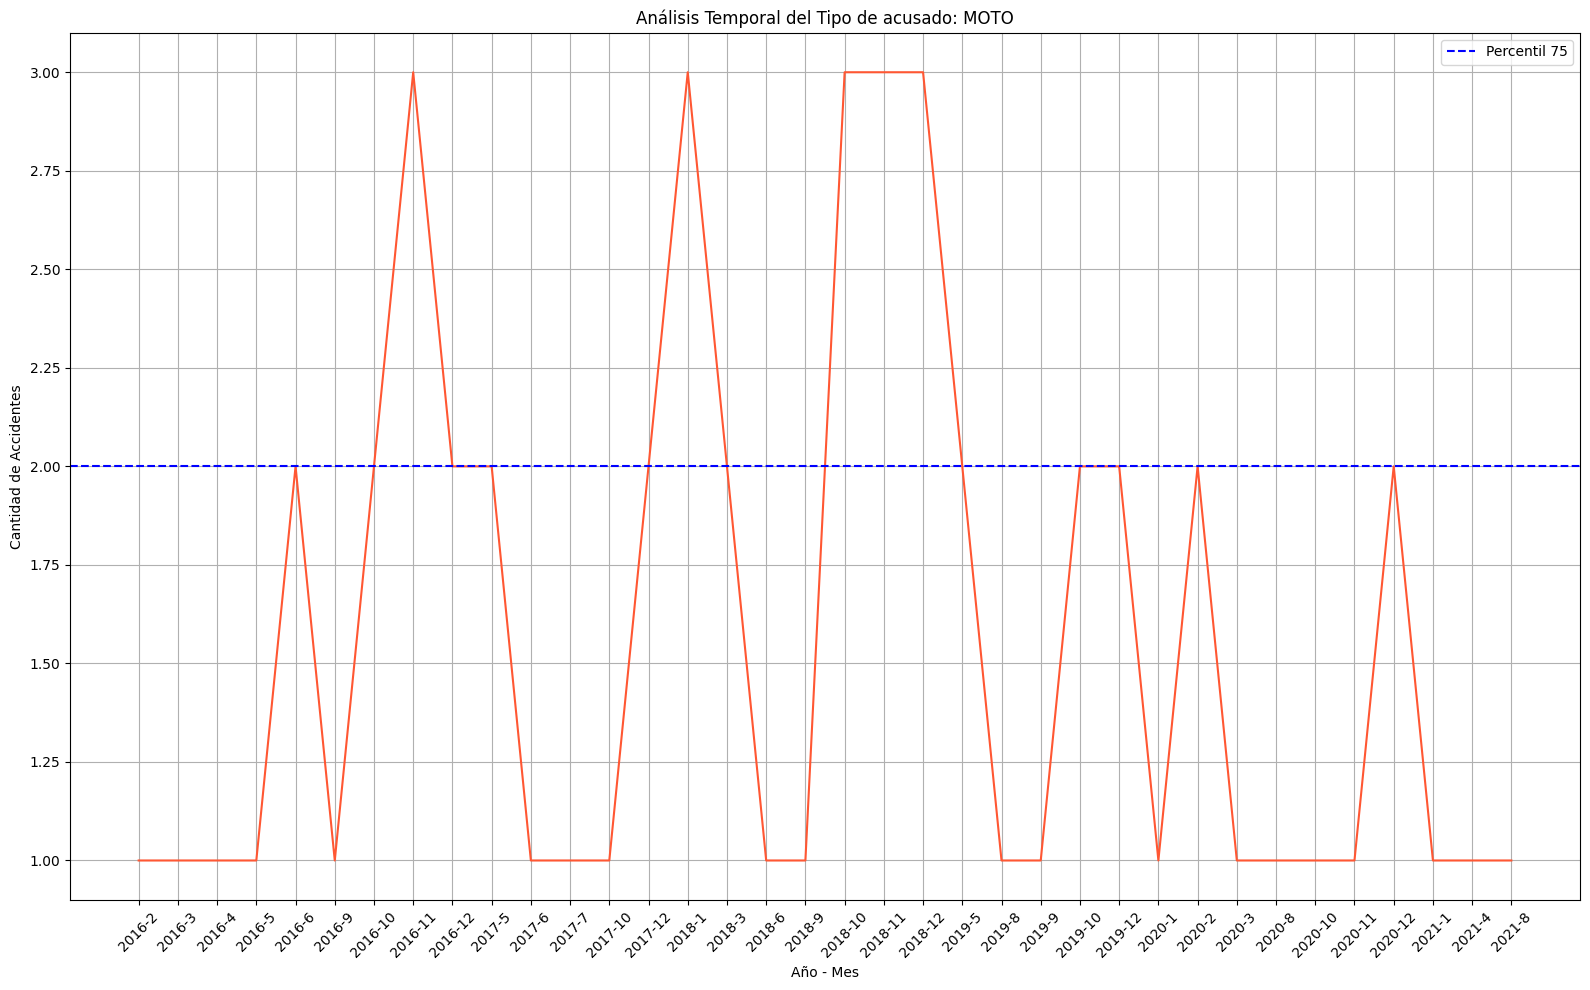

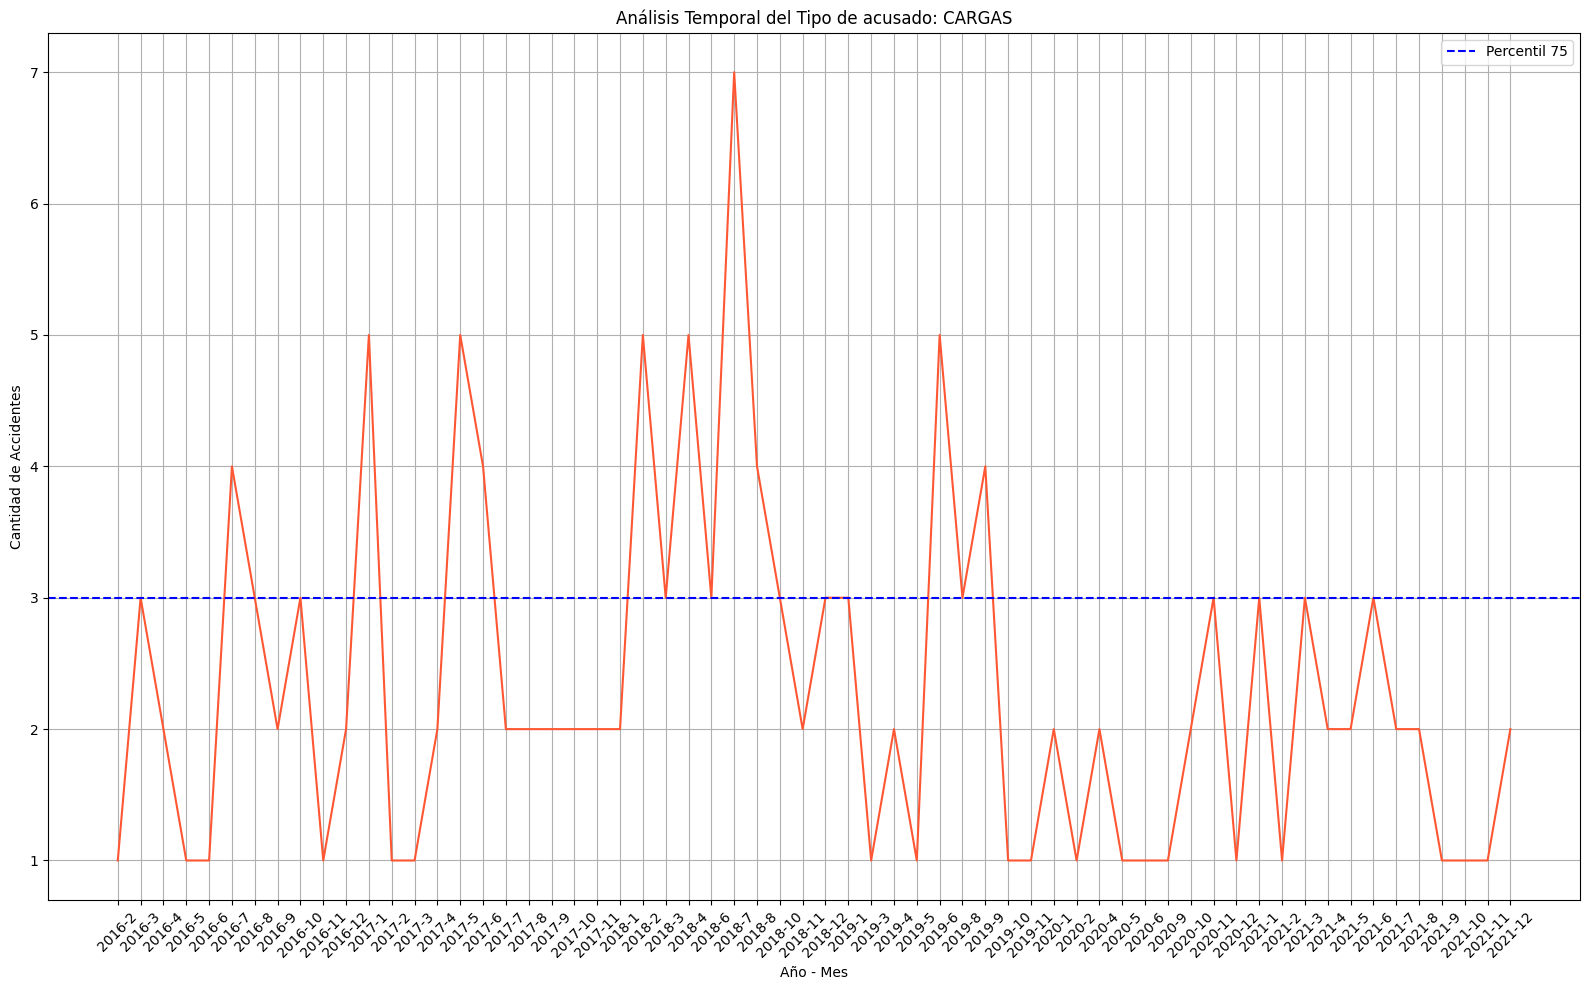

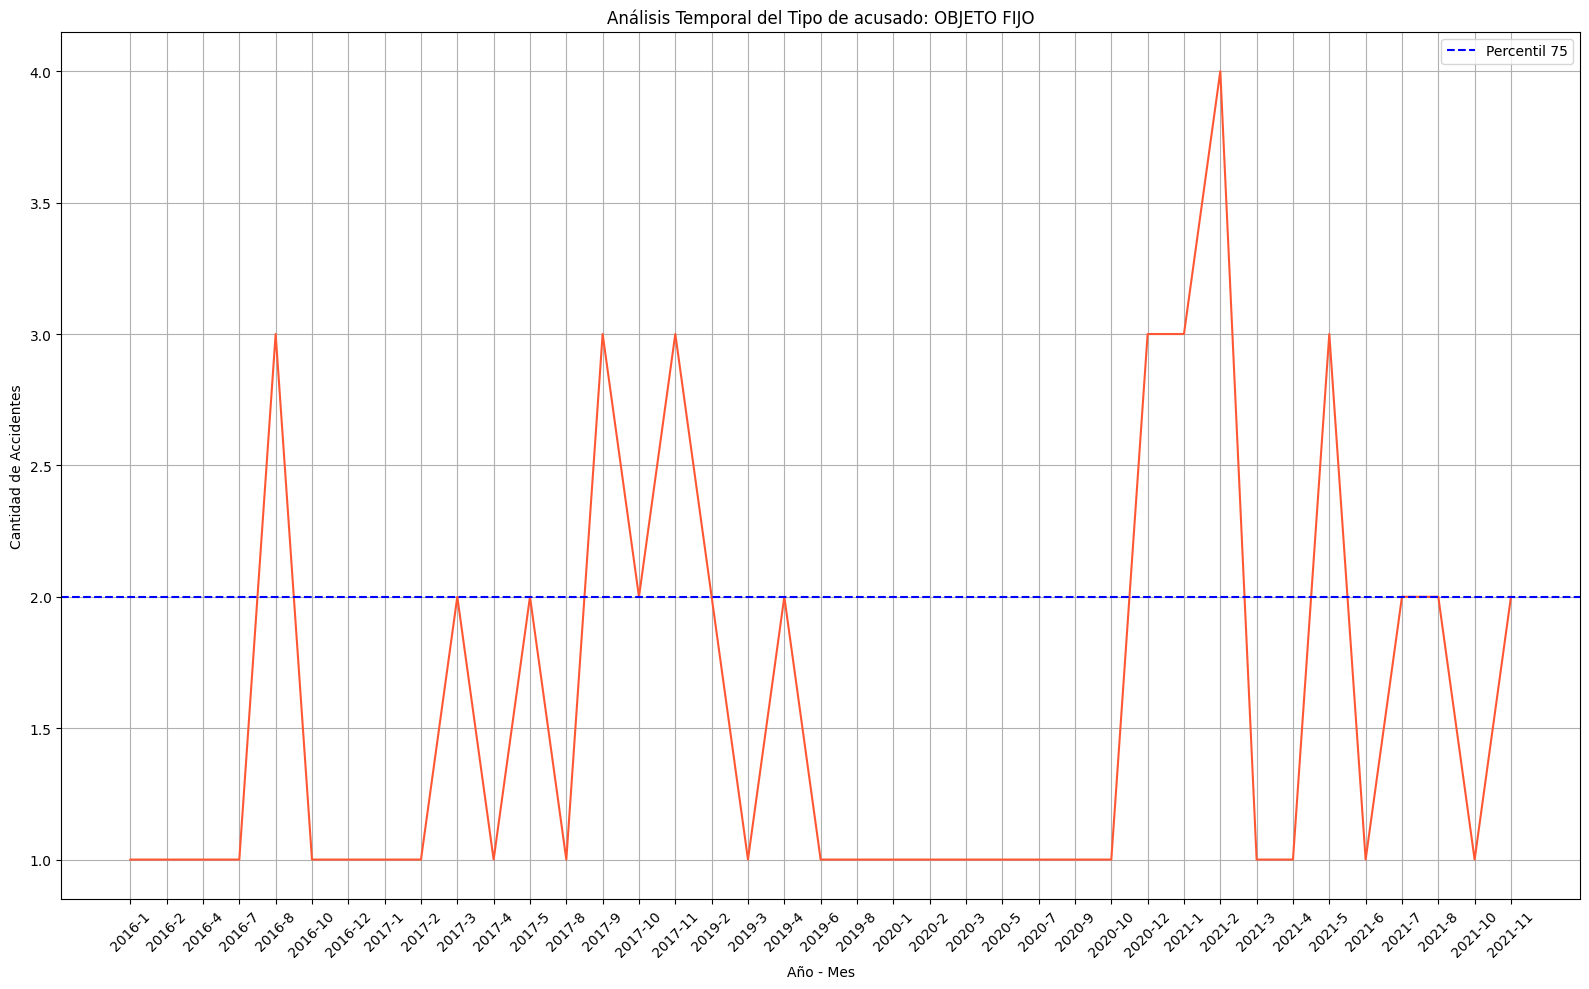

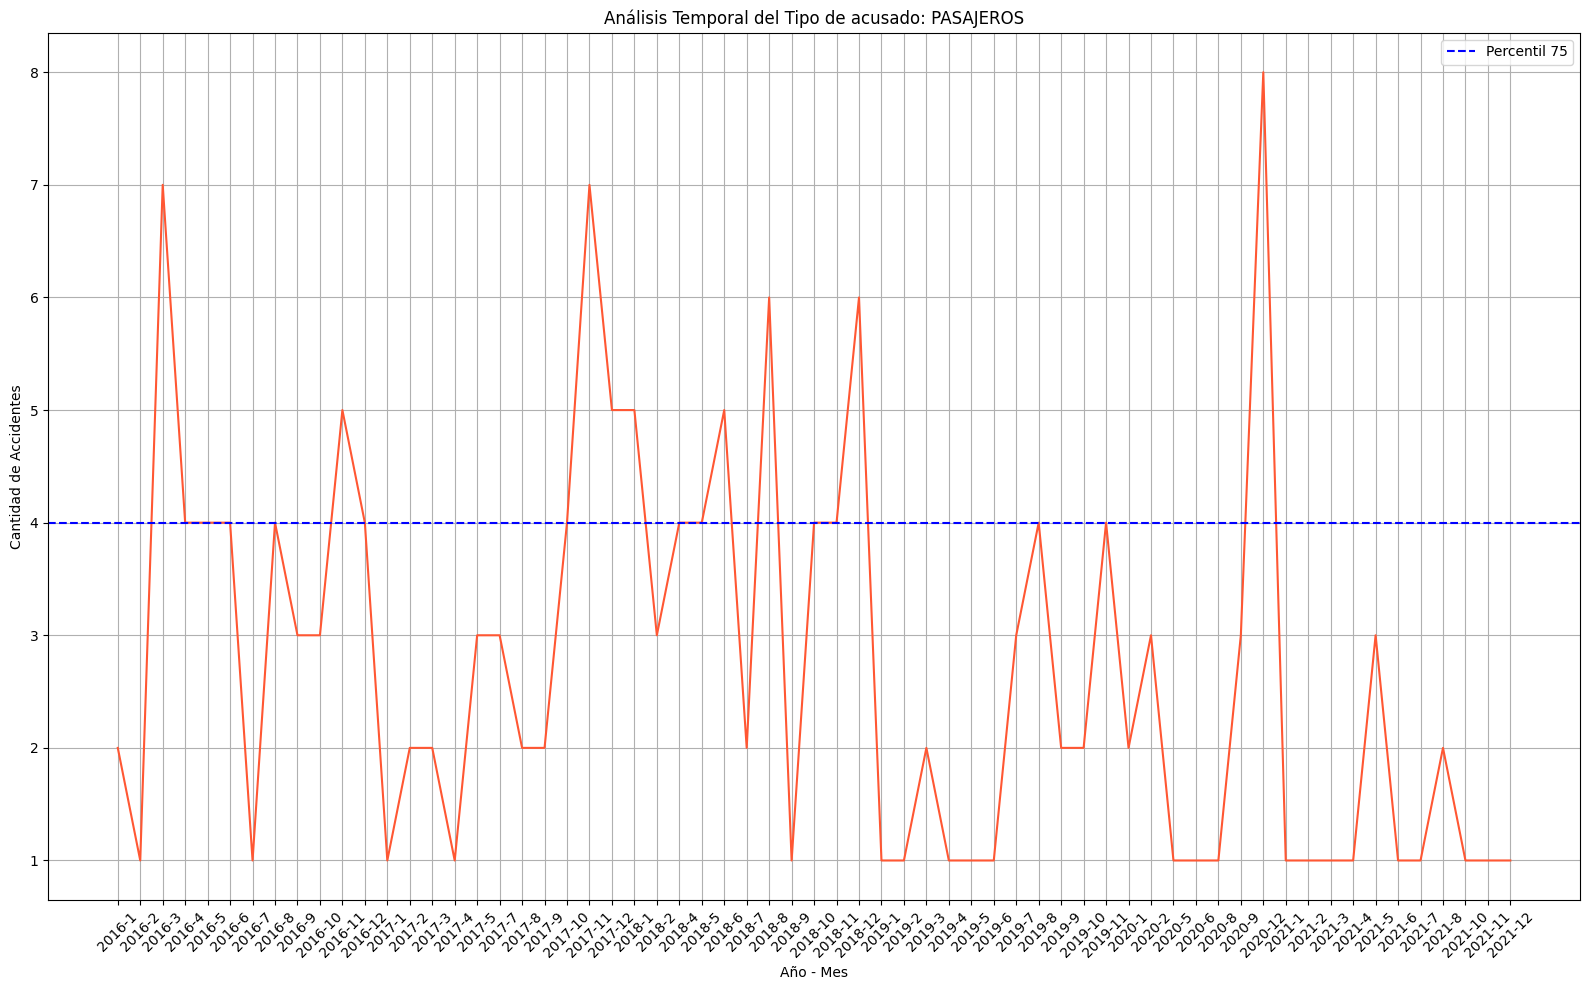

In [135]:
# Filtramos las columnas que nos interesan (AAAA, MM, ACUSADO)
df_acusado_filtrado = df_hechos[['AAAA', 'MM', 'ACUSADO']]

# Eliminamos filas con valores nulos en ACUSADO
df_acusado_filtrado = df_acusado_filtrado.dropna(subset=['ACUSADO'])

# Agrupamos por año (AAAA) y mes (MM) y contamos la cantidad de cada tipo de acusado
df_acusado_agrupado = df_acusado_filtrado.groupby(['AAAA', 'MM', 'ACUSADO']).size().reset_index(name='COUNT')

# Filtramos solo los tipos de acusados que nos interesan (AUTO, MOTO, CARGAS, OBJETO-FIJO, PASAJEROS)
tipos_acusado = ['AUTO', 'MOTO', 'CARGAS', 'OBJETO FIJO', 'PASAJEROS']
df_plot = df_acusado_agrupado[df_acusado_agrupado['ACUSADO'].isin(tipos_acusado)]

# Creamos un gráfico por cada tipo de acusado
for tipo in tipos_acusado:
    df_tipo = df_plot[df_plot['ACUSADO'] == tipo]
    
    # Calcular el percentil 75
    percentil_75 = np.percentile(df_tipo['COUNT'], 75)

    plt.figure(figsize=(16, 10))
    plt.plot(df_tipo['AAAA'].astype(str) + '-' + df_tipo['MM'].astype(str), df_tipo['COUNT'], color='#FF5733')
    
    # Añadir la línea horizontal para el percentil de 75%
    plt.axhline(y=percentil_75, color='blue', linestyle='--', label='Percentil 75')

    # Añadimos etiquetas y título
    plt.xlabel('Año - Mes')
    plt.ylabel('Cantidad de Accidentes')
    plt.title(f'Análisis Temporal del Tipo de acusado: {tipo}')
    plt.xticks(rotation=45)  # Rotamos las etiquetas del eje x para mejor visibilidad
    plt.grid(True)
    
    # Añadimos leyenda
    plt.legend()

    # Mostramos el gráfico
    plt.tight_layout()
    plt.show()

    Durante los meses del periodo analizado (2016-2021), se tiene que el 75% de estos meses registra un promedio de:
    - 4 accidentes ocacionados por autos.
    - 2 accidentes ocacionados por motos.
    - 3 accidentes ocacionados por cargas.
    - 2 accidentes ocacionados por objeto fijo.
    - 4 accidentes ocacionados por pasajeros.

    Además, para todos los tipos de acusados, exceptuando objeto fijo, se observa una disminución en la cantidad de accidentes y la recurrencia de los mismos a partir del año 2019. 

### *Distribución acusados por hora en la que ocurrieron los siniestros*

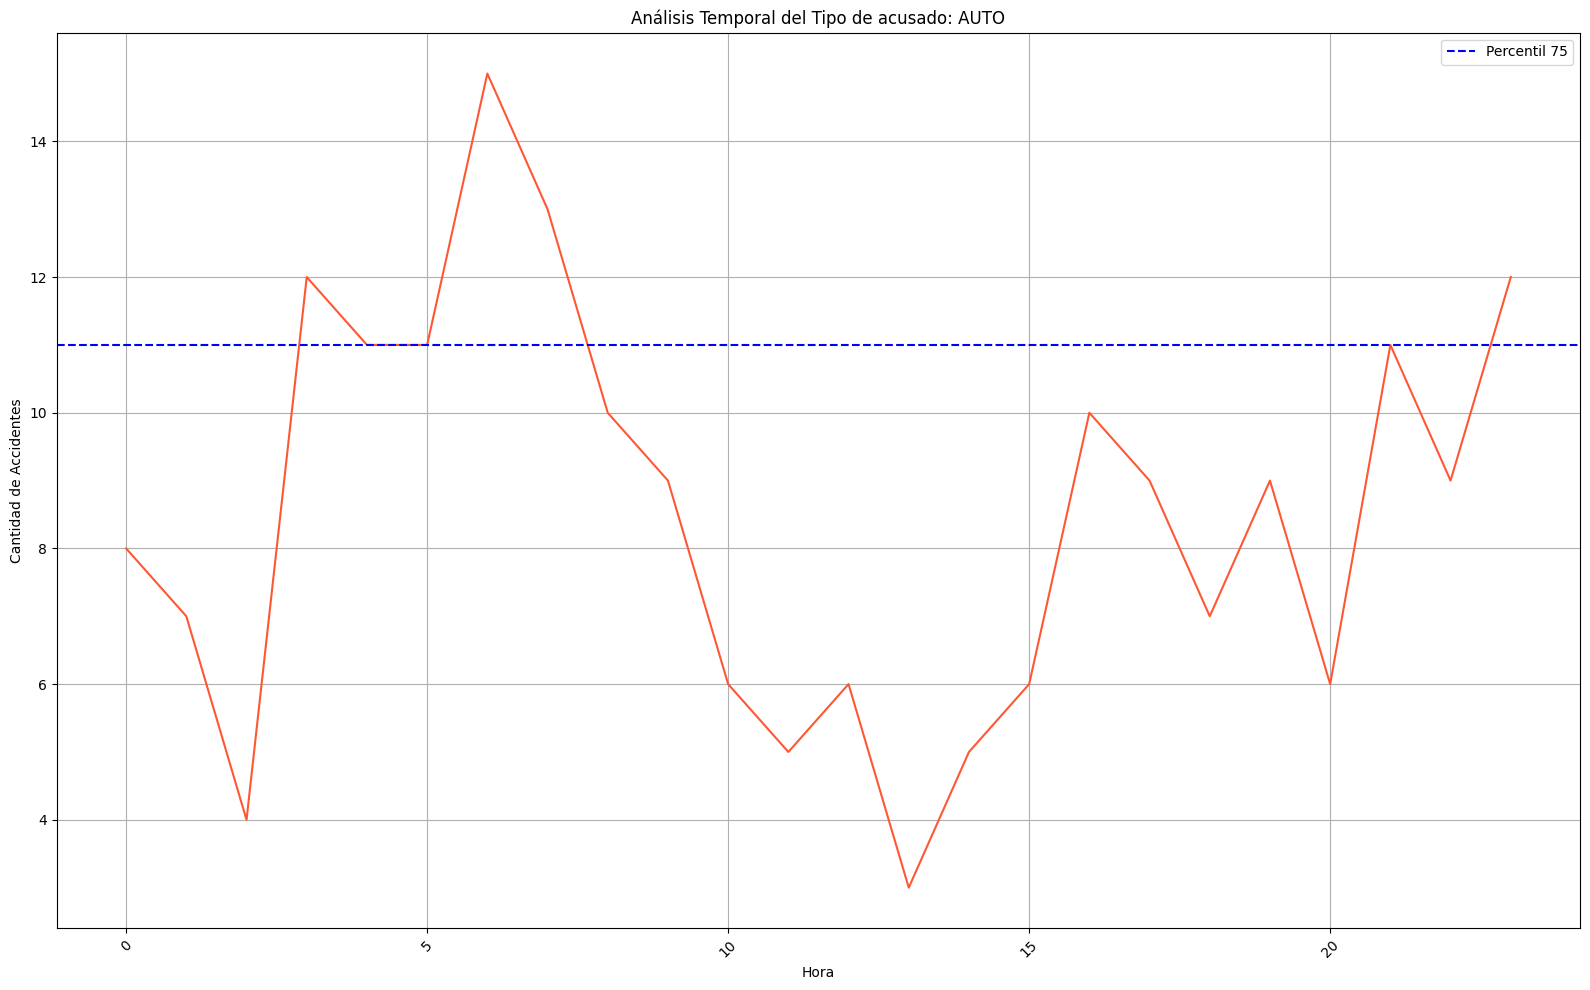

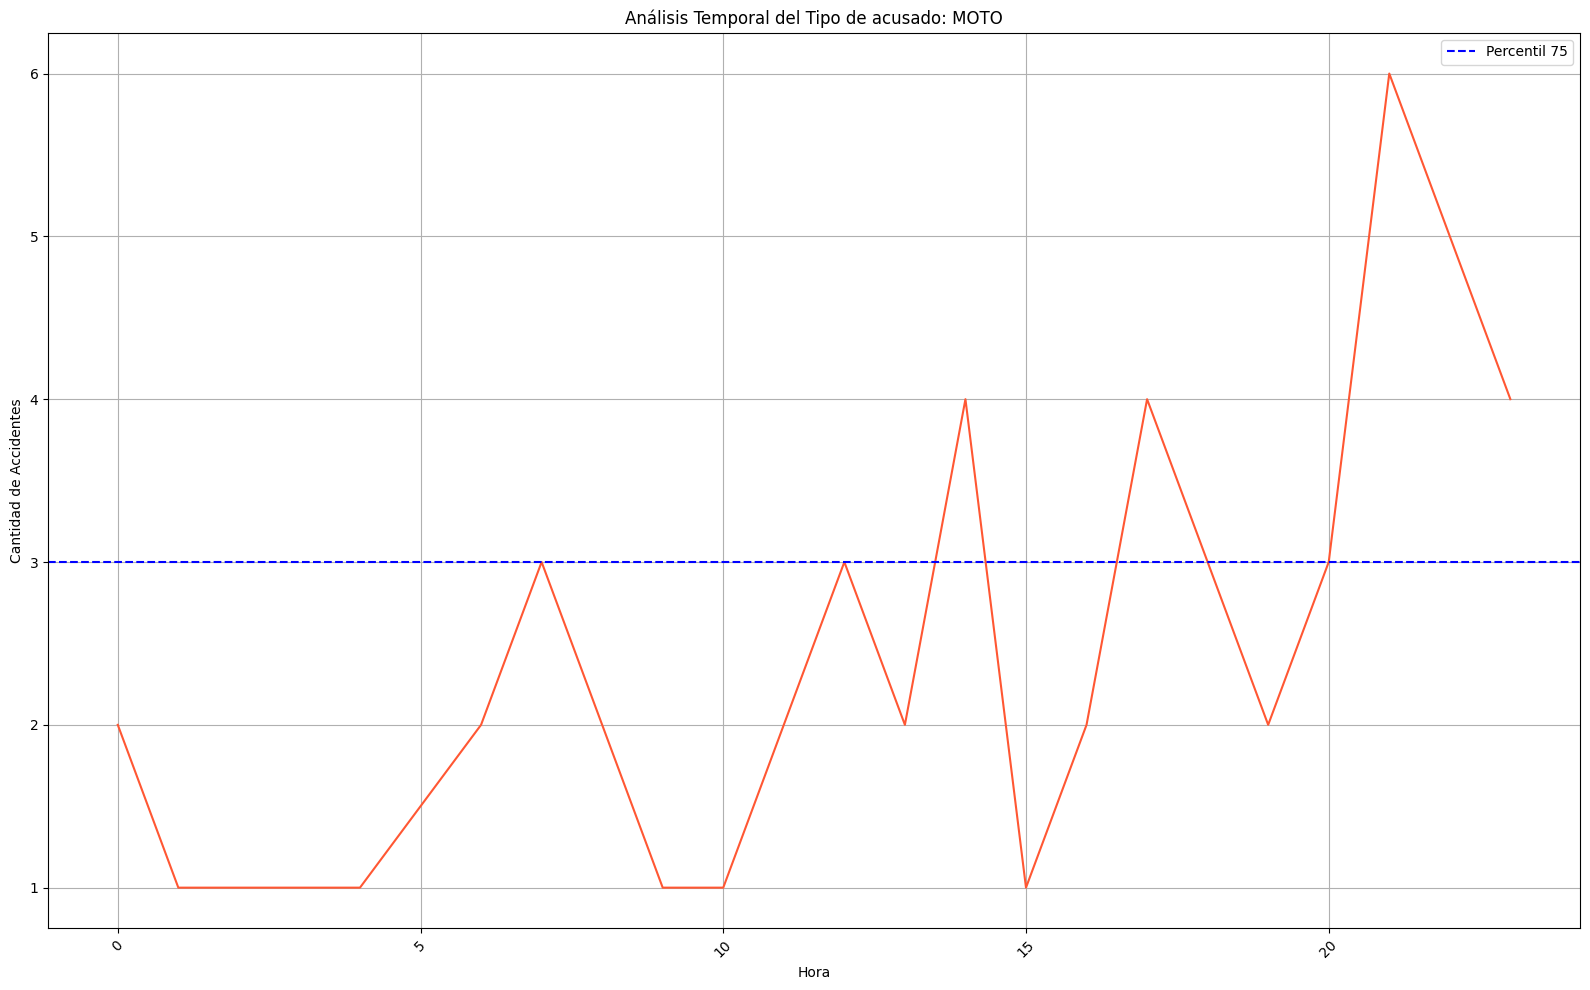

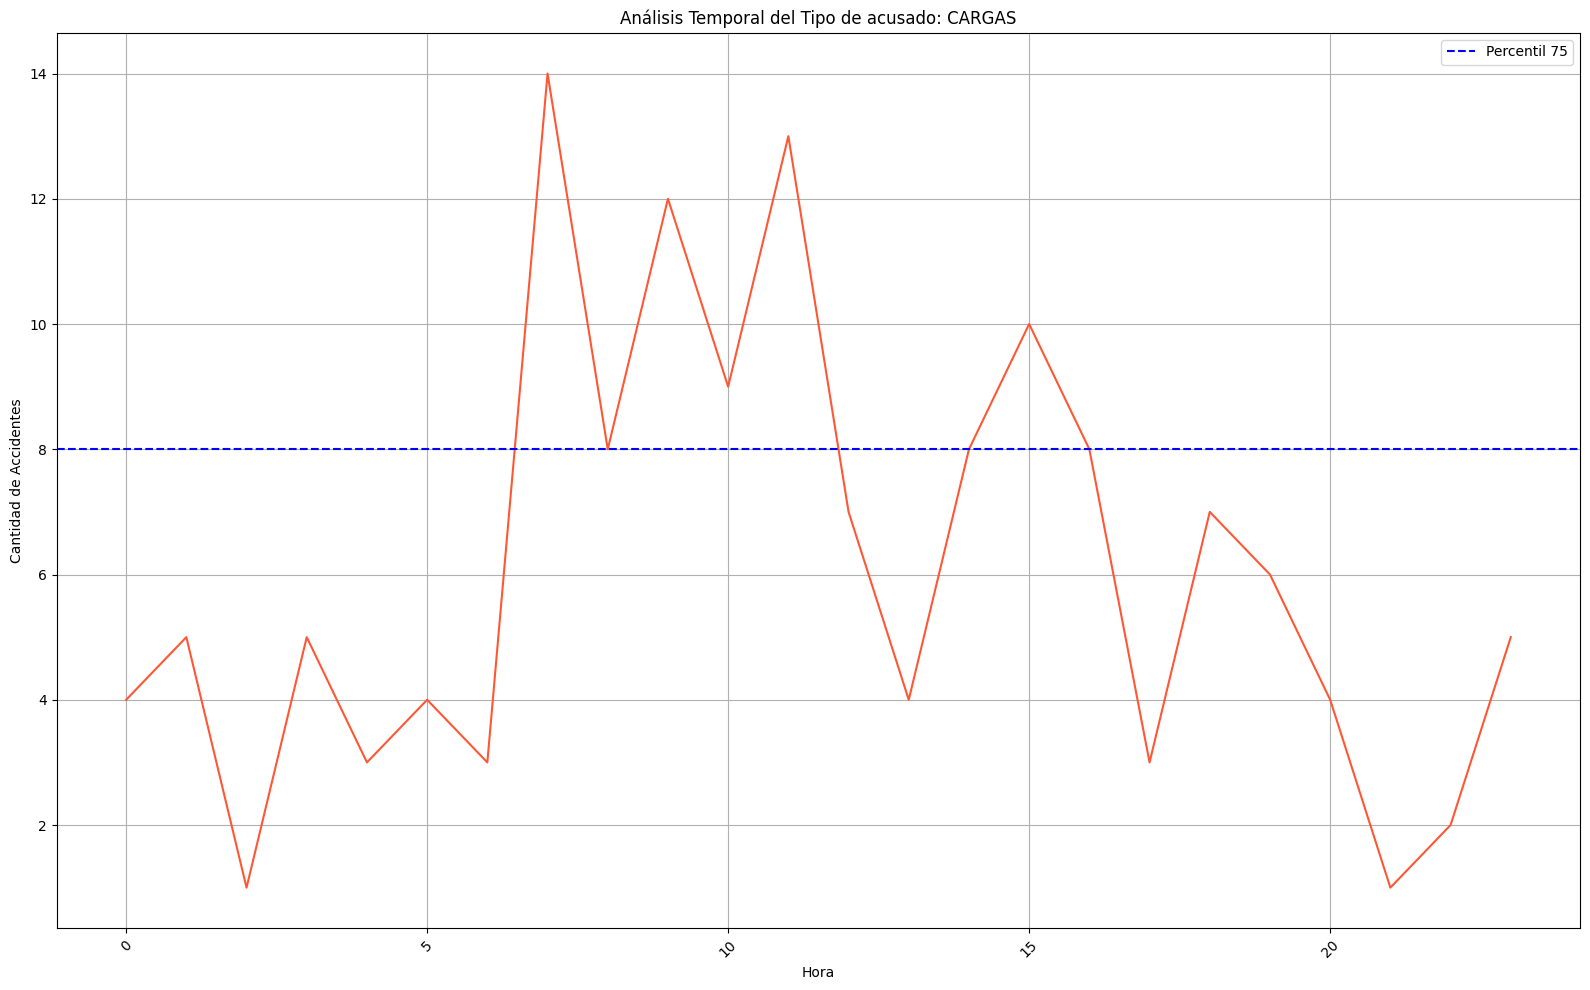

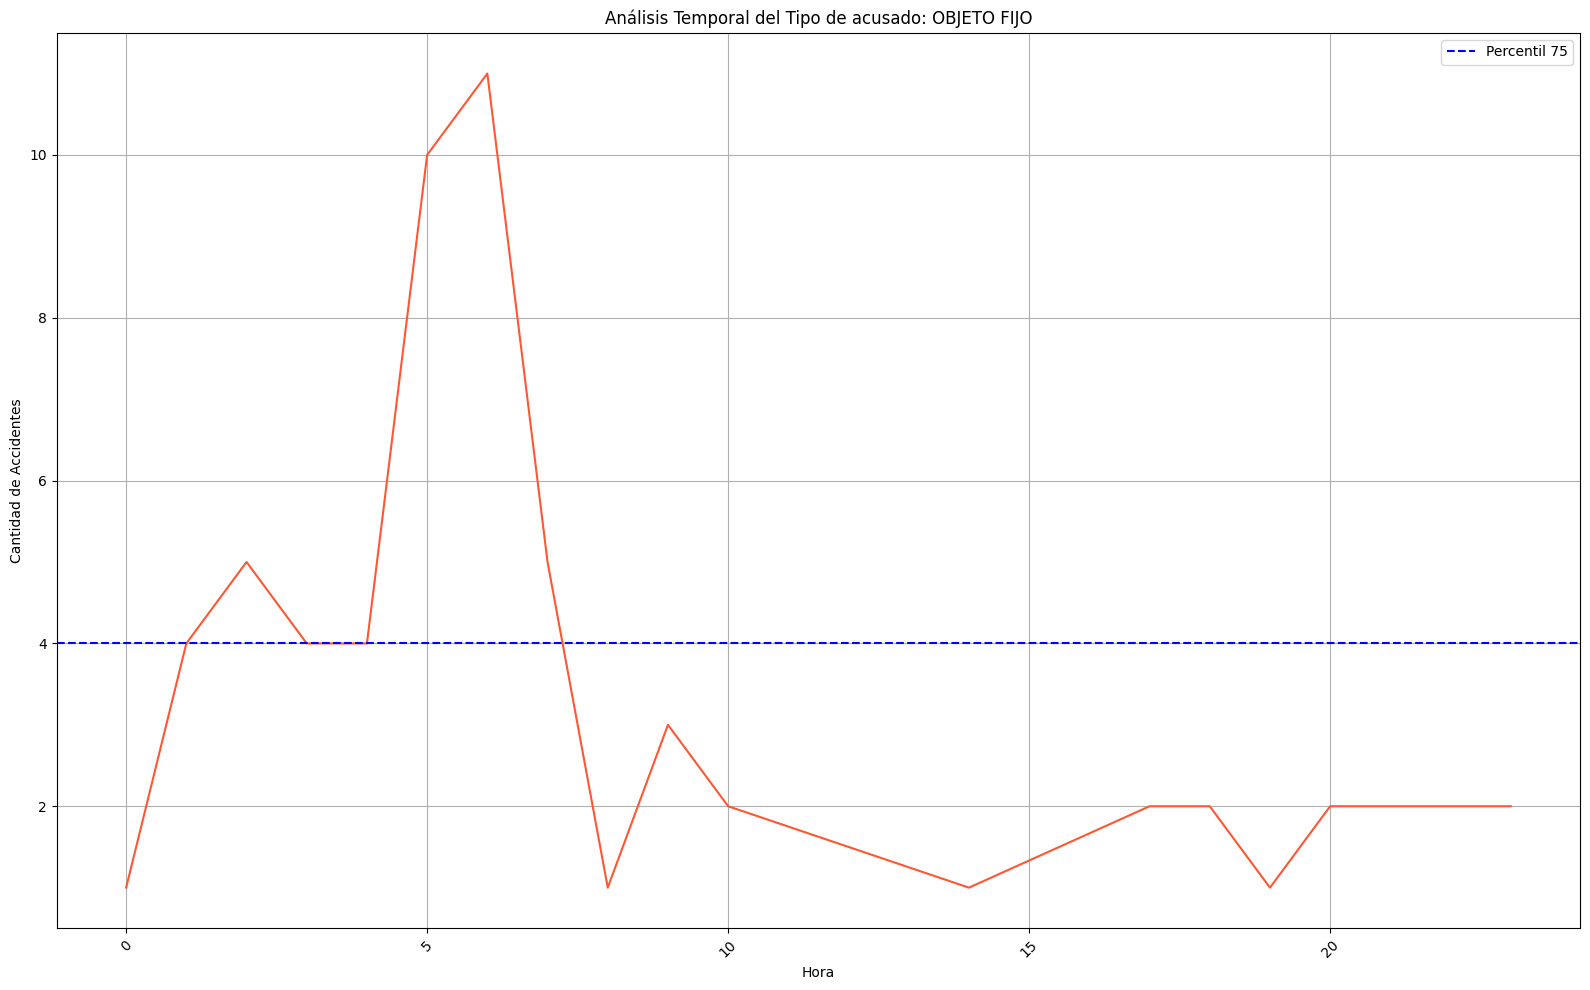

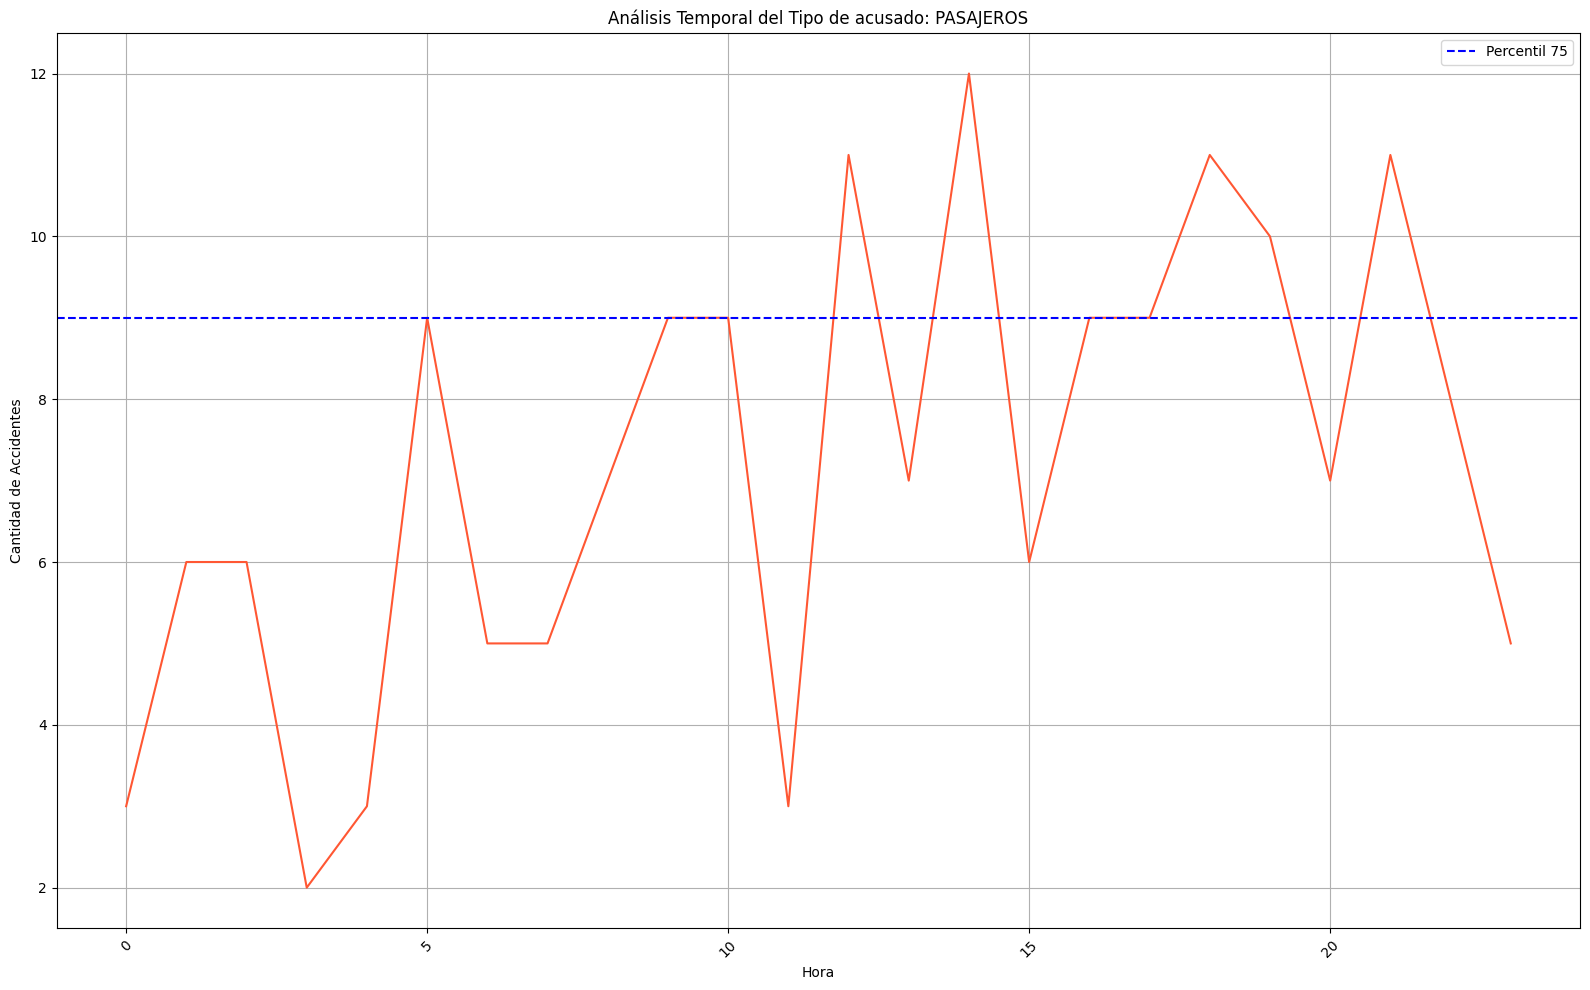

In [137]:
# Filtramos las columnas que nos interesan (AAAA, MM, ACUSADO)
df_acusado_filtrado = df_hechos[['HH', 'ACUSADO']]

# Eliminamos filas con valores nulos en ACUSADO
df_acusado_filtrado = df_acusado_filtrado.dropna(subset=['ACUSADO'])

# Agrupamos por Hora y contamos la cantidad de cada tipo de acusado
df_acusado_agrupado = df_acusado_filtrado.groupby(['HH', 'ACUSADO']).size().reset_index(name='COUNT')

# Filtramos solo los tipos de acusados que nos interesan (AUTO, MOTO, CARGAS, OBJETO-FIJO, PASAJEROS)
tipos_acusado = ['AUTO', 'MOTO', 'CARGAS', 'OBJETO FIJO', 'PASAJEROS']
df_plot = df_acusado_agrupado[df_acusado_agrupado['ACUSADO'].isin(tipos_acusado)]

# Creamos un gráfico por cada tipo de acusado
for tipo in tipos_acusado:
    df_tipo = df_plot[df_plot['ACUSADO'] == tipo]
    
    # Calcular el percentil 75
    percentil_75 = np.percentile(df_tipo['COUNT'], 75)

    plt.figure(figsize=(16, 10))
    plt.plot(df_tipo['HH'], df_tipo['COUNT'], color='#FF5733')
    
    # Añadir la línea horizontal para el percentil de 75%
    plt.axhline(y=percentil_75, color='blue', linestyle='--', label='Percentil 75')

    # Añadimos etiquetas y título
    plt.xlabel('Hora')
    plt.ylabel('Cantidad de Accidentes')
    plt.title(f'Análisis Temporal del Tipo de acusado: {tipo}')
    plt.xticks(rotation=45)  # Rotamos las etiquetas del eje x para mejor visibilidad
    plt.grid(True)
    
    # Añadimos leyenda
    plt.legend()

    # Mostramos el gráfico
    plt.tight_layout()
    plt.show()

    Como previamente se habia mencionado, la mayor cantidad de victimas en los siniestros ocurre en horario laboral, es decir, entrada-almuerzo-salida. Con en el gráfico del analisis temporal se puede corroborar el mayor causante de estos siniestros en ese horario es ocasionado por el auto.

    Los siniestros ocasionados por las motos, cargas y objeto fijo, se tiene que el horario donde se produce la mayor cantidad de accidentes es en la noche, a media mañana y en la mañana, respectivamente.
    
    Los siniestros ocasionados por los pasajeros, como ya se habia visto previamente, es uno de los causantes de la mayor cantidad de victimas historicamente. El gráfico del análisis temporal nos muestra que efectivamente lis siniestros ocurren en la mayor parte del día, teniendo una pequeña disminución en la madrugada.

### *Distribución del número de víctimas por tipo de acusado en cada comuna*

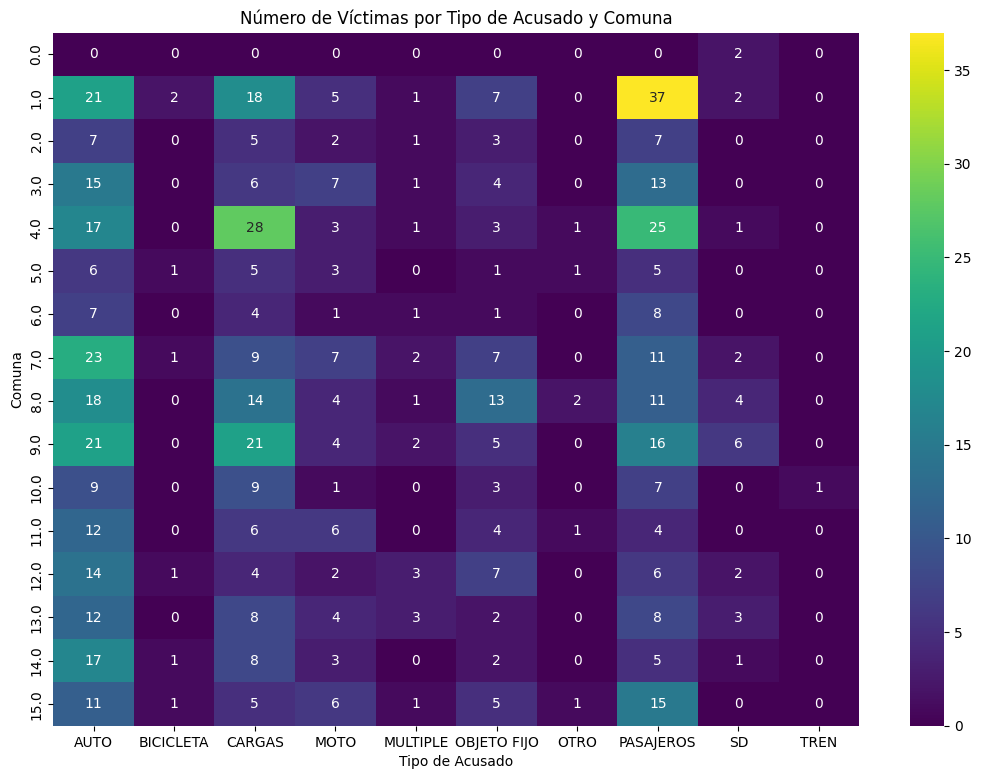

In [152]:
# Crear una tabla pivote para tener los tipos de acusados como columnas
tabla_pivote_acusado = df_hechos.pivot_table(index='COMUNA', columns='ACUSADO', values='N_VICTIMAS', aggfunc='sum', fill_value=0)

# Crear un heatmap
plt.figure(figsize=(13, 9))
sns.heatmap(tabla_pivote_acusado, cmap='viridis', annot=True, fmt='d')
plt.title('Número de Víctimas por Tipo de Acusado y Comuna')
plt.xlabel('Tipo de Acusado')
plt.ylabel('Comuna')

# Mostrar el gráfico
plt.show()

    - El 44% de las comunas poseen la mayor cantidad de siniestros donde se encuentra el mayor número de victimas, las cuales son: 1, 3, 4, 7, 8 , 9, 14.
    - De entre las comunas más afectadas, el 43% de estas (1, 4, 9) contiene la mayor cantidad de victimas.
    Esto sugiere que puede haber algunos factores que contribuyen al elevado número de víctimas de cierto tipo de víctimas en algunas comunas, como las malas condiciones de las carreteras, el alto volumen de tráfico o la conducción imprudente.

### *Distribución de víctimas*

Porcentaje de tipo de victimas en los siniestros ocurridos

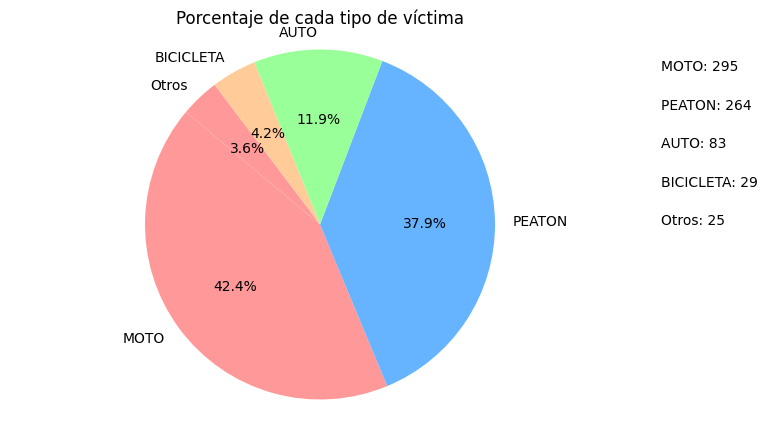

In [72]:
# Calcular el conteo de cada tipo de víctima
conteo_victimas = df_hechos['VICTIMA'].value_counts()

# Filtrar las categorías menos frecuentes
umbral = 10  # Define un umbral para agrupar categorías menos frecuentes
categorias_frecuentes = conteo_victimas[conteo_victimas >= umbral]
categorias_menos_frecuentes = conteo_victimas[conteo_victimas < umbral]

# Crear una nueva categoría 'Otros' para las menos frecuentes
otros = categorias_menos_frecuentes.sum()
categorias_frecuentes['Otros'] = otros

# Crear el gráfico de pastel
plt.figure(figsize=(8, 5))
plt.pie(categorias_frecuentes, labels=categorias_frecuentes.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Porcentaje de cada tipo de víctima')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Agregar etiquetas fuera del gráfico
for i, (categoria, valor) in enumerate(categorias_frecuentes.items()):
    plt.text(1.05, 0.9-i*0.1, f'{categoria}: {valor}', fontsize=10, transform=plt.gca().transAxes)

plt.show()

Cantidad de victimas por tipo de victima en los siniestros

In [70]:
# Calcular el tipo de víctimas por número de victimas
victimas_por_n_victimas = df_hechos.groupby('VICTIMA')['N_VICTIMAS'].sum()

In [71]:
victimas_por_n_victimas.describe()

count     10.000000
mean      71.700000
std      115.483573
min        2.000000
25%        3.500000
50%        8.000000
75%       76.250000
max      302.000000
Name: N_VICTIMAS, dtype: float64

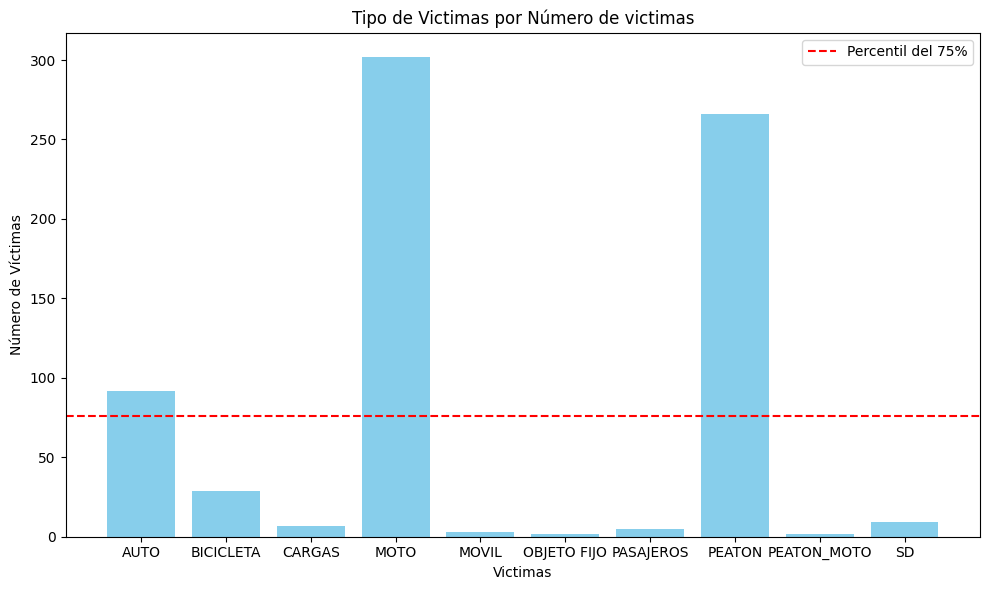

In [148]:
# Calcular el percentil del 75%
percentil_75 = victimas_por_n_victimas.quantile(0.75)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(victimas_por_n_victimas.index, victimas_por_n_victimas.values, color='skyblue')

# Añadir la línea horizontal para el percentil del 75%
plt.axhline(y=percentil_75, color='red', linestyle='--', label='Percentil del 75%')

# Añadir títulos y etiquetas
plt.title('Tipo de Victimas por Número de victimas')
plt.xlabel('Victimas')
plt.ylabel('Número de Víctimas')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

    Los gráficos de distribución por tipo de victima nos permite visualizar cuales son los más afectados por los siniestros causados por los acusados, los cuales a su vez permiten generar hipótesis de porque sucede esto, como por ejemplo la imprudencia de los mismos o el no reapetar las normas de transito.

### *Análisis temporal de las victimas por cantidad de siniestros*

Debido a que las victimas más recurrentes son autos, motos, biciletas y peatones, el grafico se realiará con estos valores, puesto que son los más relevantes.

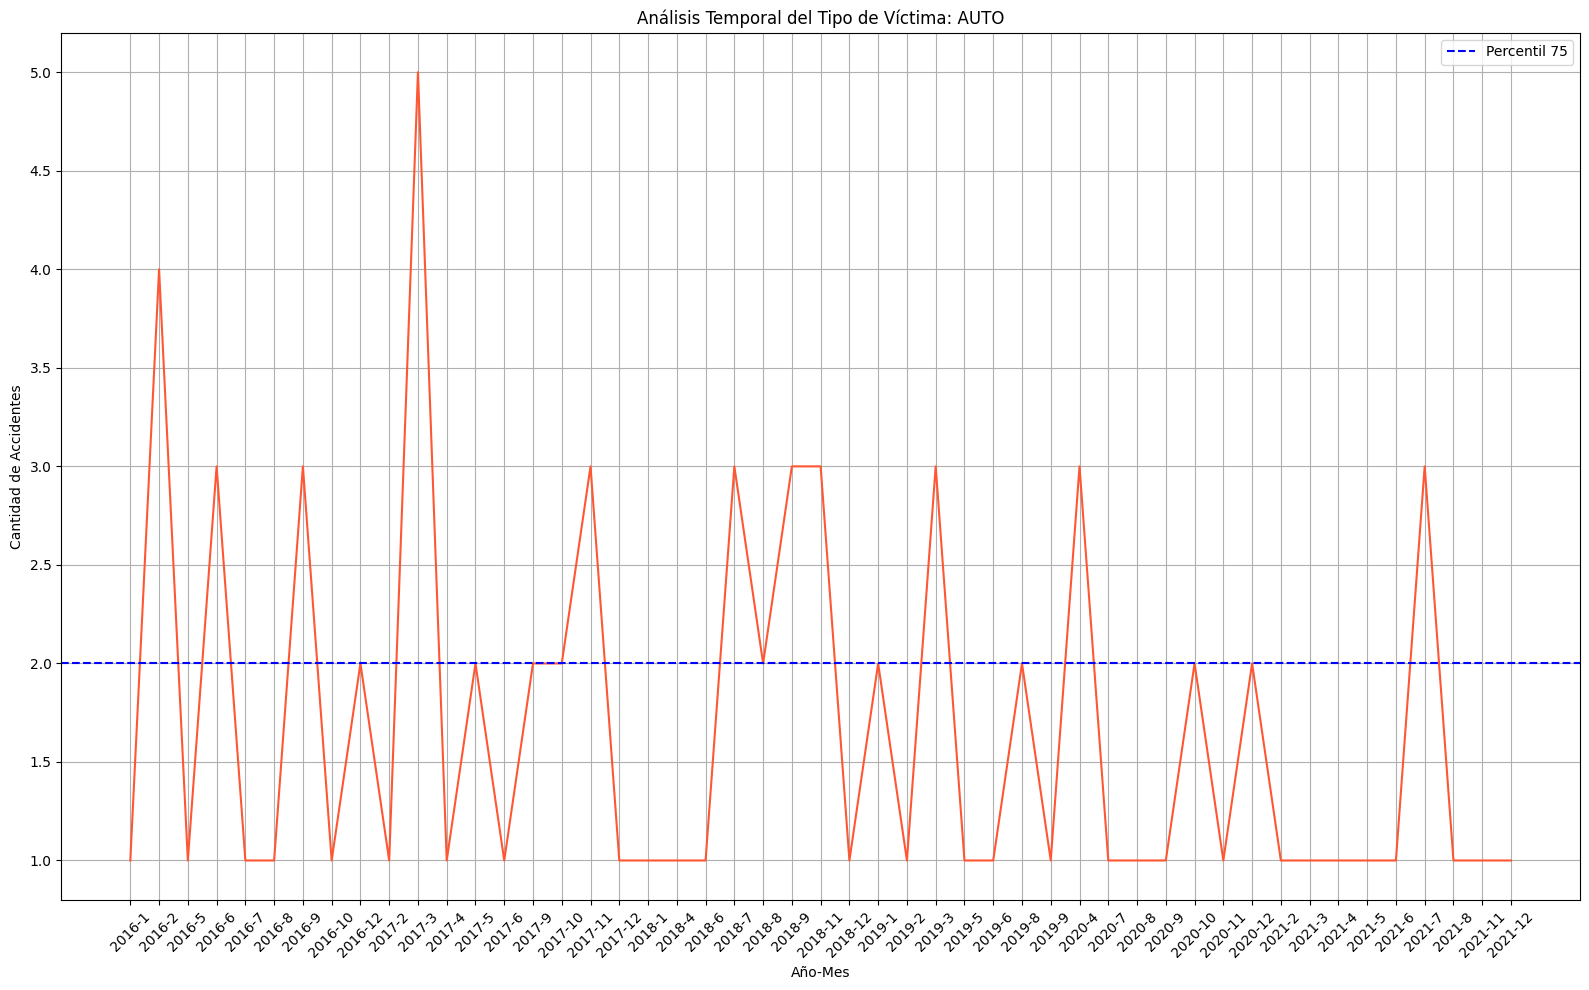

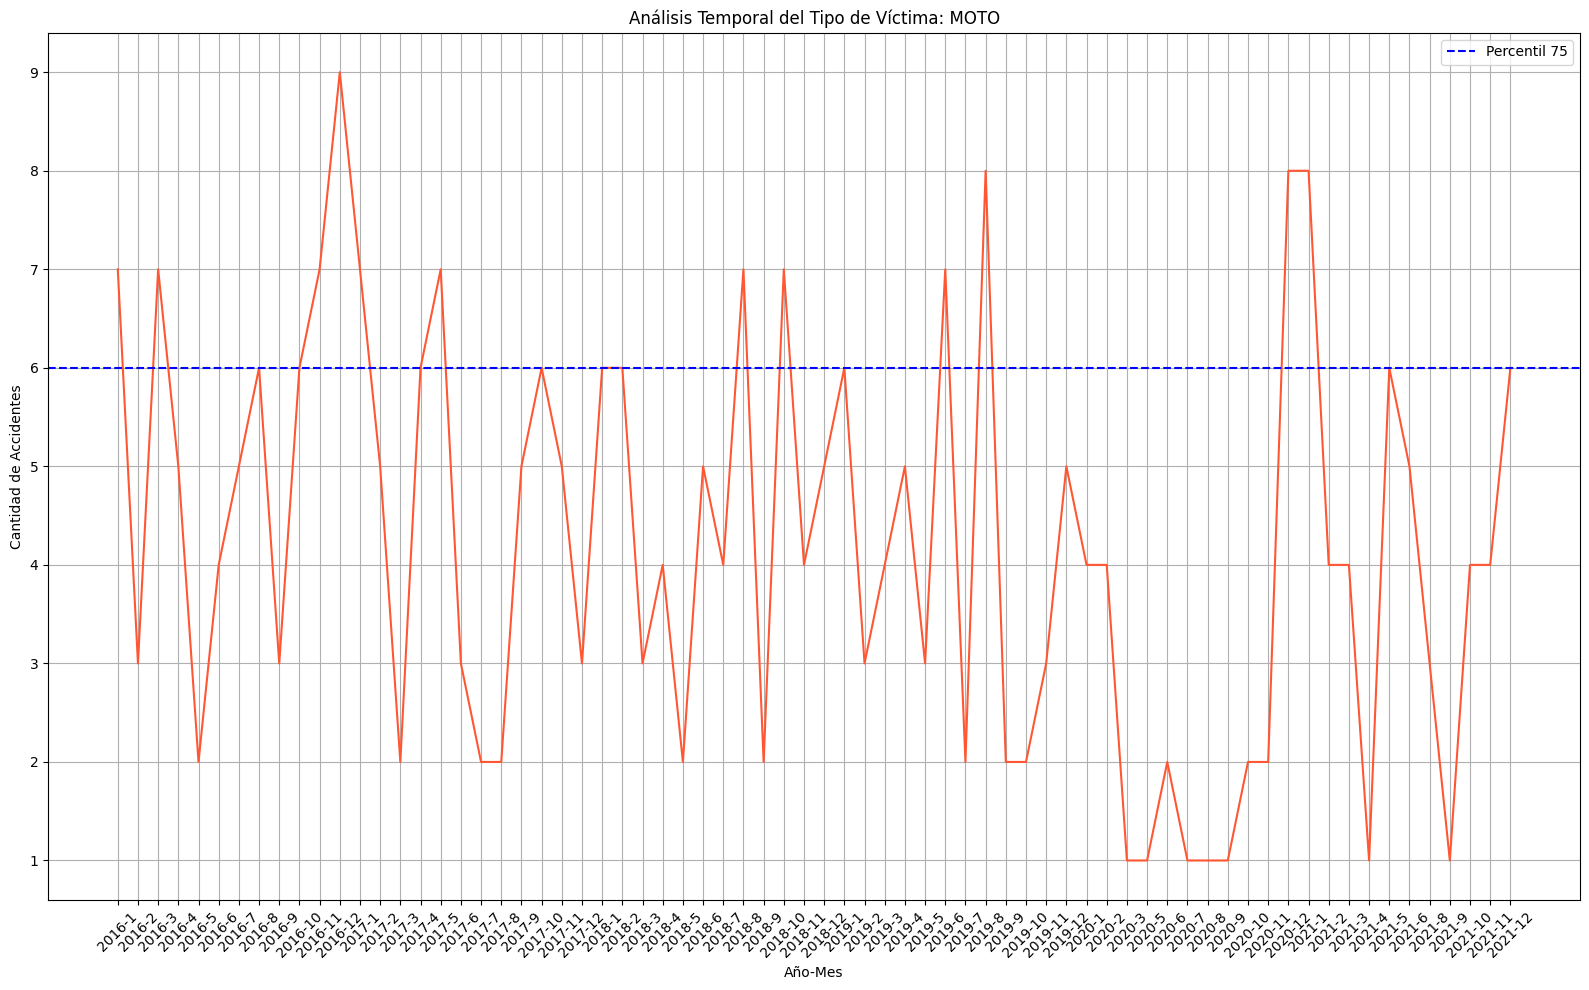

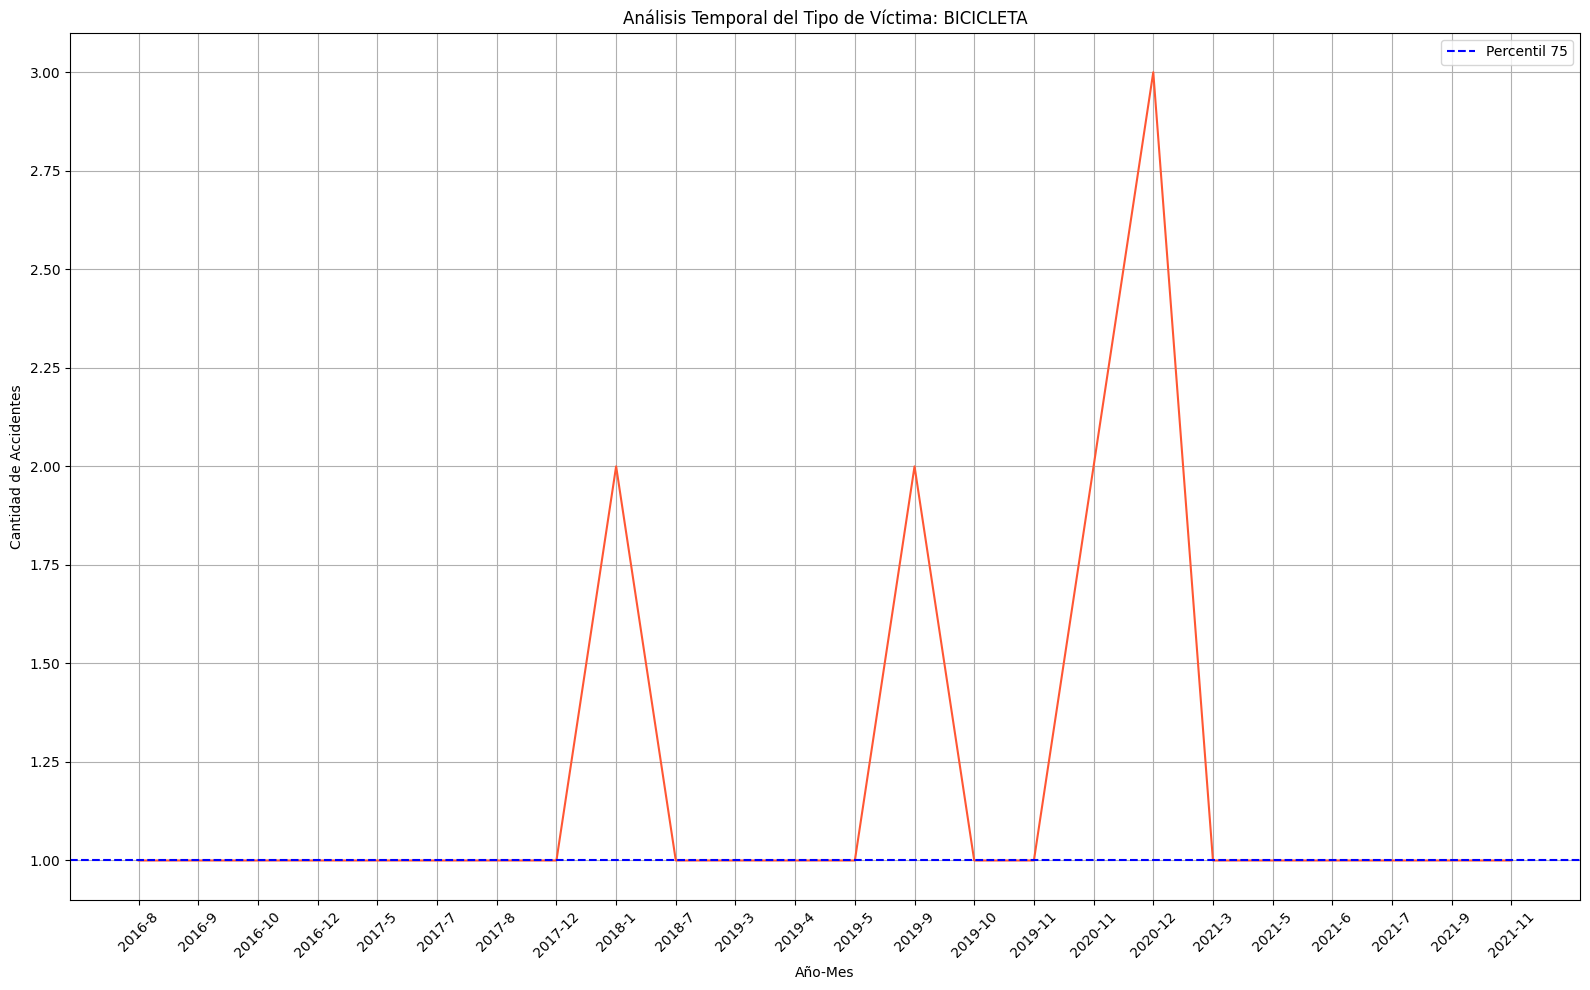

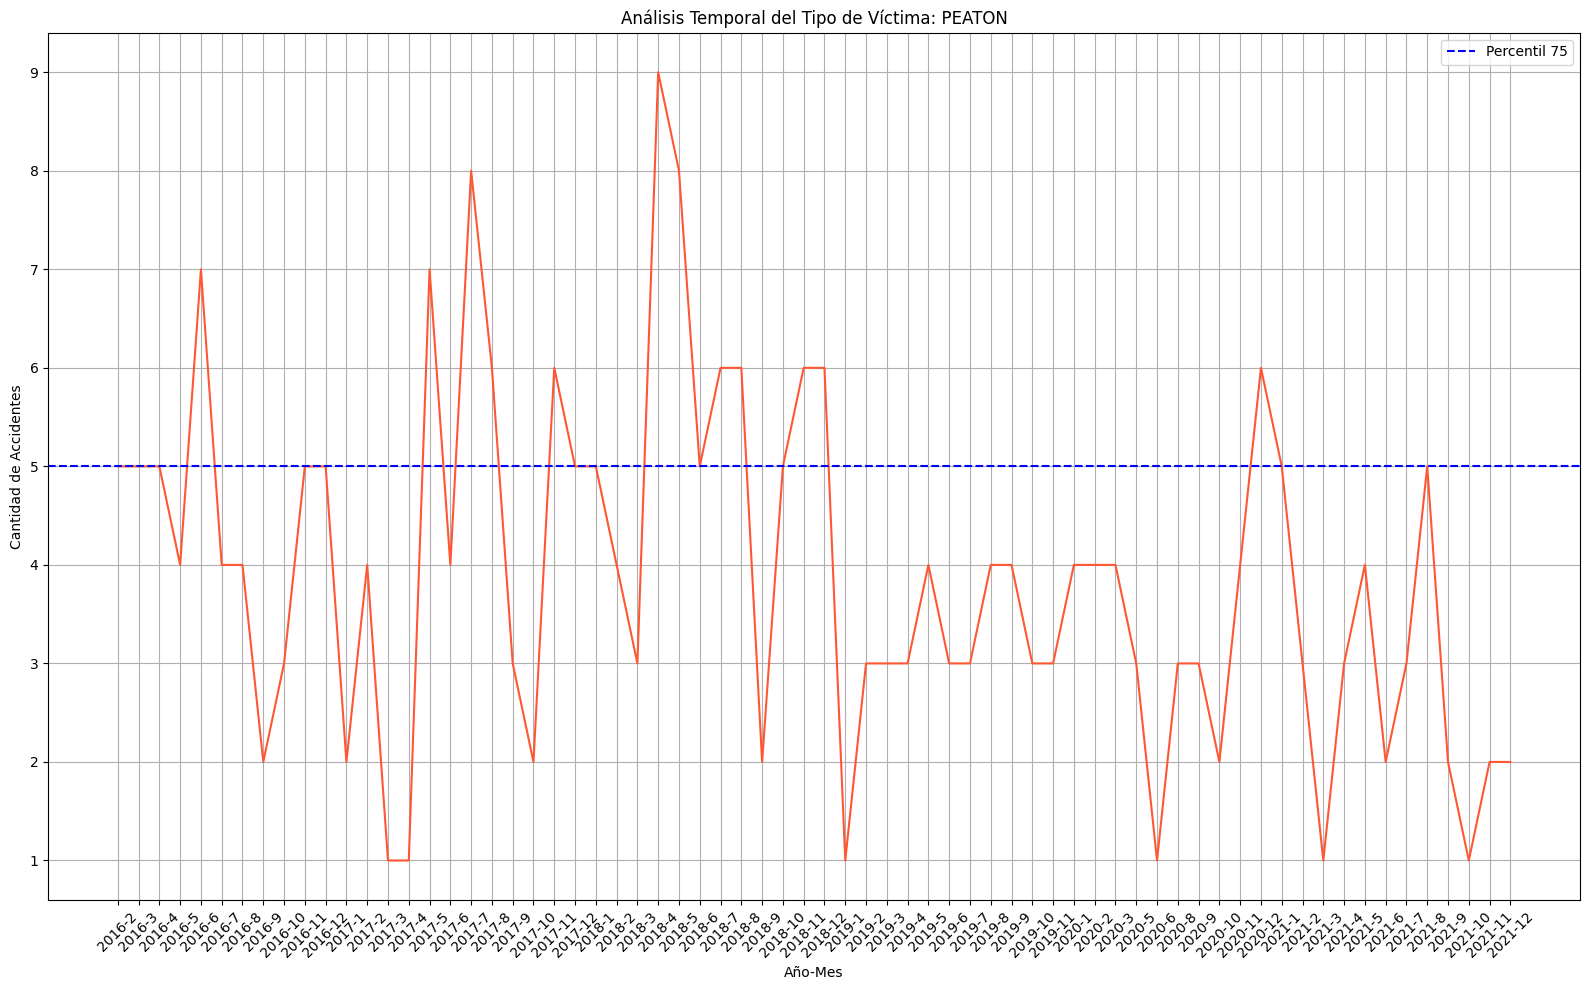

In [150]:
# Filtramos las columnas que nos interesan (AAAA, MM, VICTIMA)
df_victimas_filtrado = df_hechos[['AAAA', 'MM', 'VICTIMA']]

# Eliminamos filas con valores nulos en VICTIMA
df_victimas_filtrado = df_victimas_filtrado.dropna(subset=['VICTIMA'])

# Agrupamos por año (AAAA) y mes (MM) y contamos la cantidad de cada tipo de víctima
df_victimas_agrupado = df_victimas_filtrado.groupby(['AAAA', 'MM', 'VICTIMA']).size().reset_index(name='COUNT')

# Filtramos solo los tipos de víctimas que nos interesan (AUTO, MOTO, BICICLETA, PEATON)
tipos_victimas = ['AUTO', 'MOTO', 'BICICLETA', 'PEATON']
df_plot = df_victimas_agrupado[df_victimas_agrupado['VICTIMA'].isin(tipos_victimas)]

# Creamos un gráfico por cada tipo de víctima
for tipo in tipos_victimas:
    df_tipo = df_plot[df_plot['VICTIMA'] == tipo]
    
    # Calcular el percentil 75
    percentil_75 = np.percentile(df_tipo['COUNT'], 75)

    plt.figure(figsize=(16, 10))
    plt.plot(df_tipo['AAAA'].astype(str) + '-' + df_tipo['MM'].astype(str), df_tipo['COUNT'], color='#FF5733')
      
    # Añadir la línea horizontal para el percentil de 75%
    plt.axhline(y=percentil_75, color='blue', linestyle='--', label='Percentil 75')

    # Añadimos etiquetas y título
    plt.xlabel('Año-Mes')
    plt.ylabel('Cantidad de Accidentes')
    plt.title(f'Análisis Temporal del Tipo de Víctima: {tipo}')
    plt.xticks(rotation=45)  # Rotamos las etiquetas del eje x para mejor visibilidad
    plt.grid(True)
     
    # Añadimos leyenda
    plt.legend()

    # Mostramos el gráfico
    plt.tight_layout()
    plt.show()

    Aqui va el comentario de los gráficos

### *Distribución víctimas por hora en la que ocurrieron los siniestros*

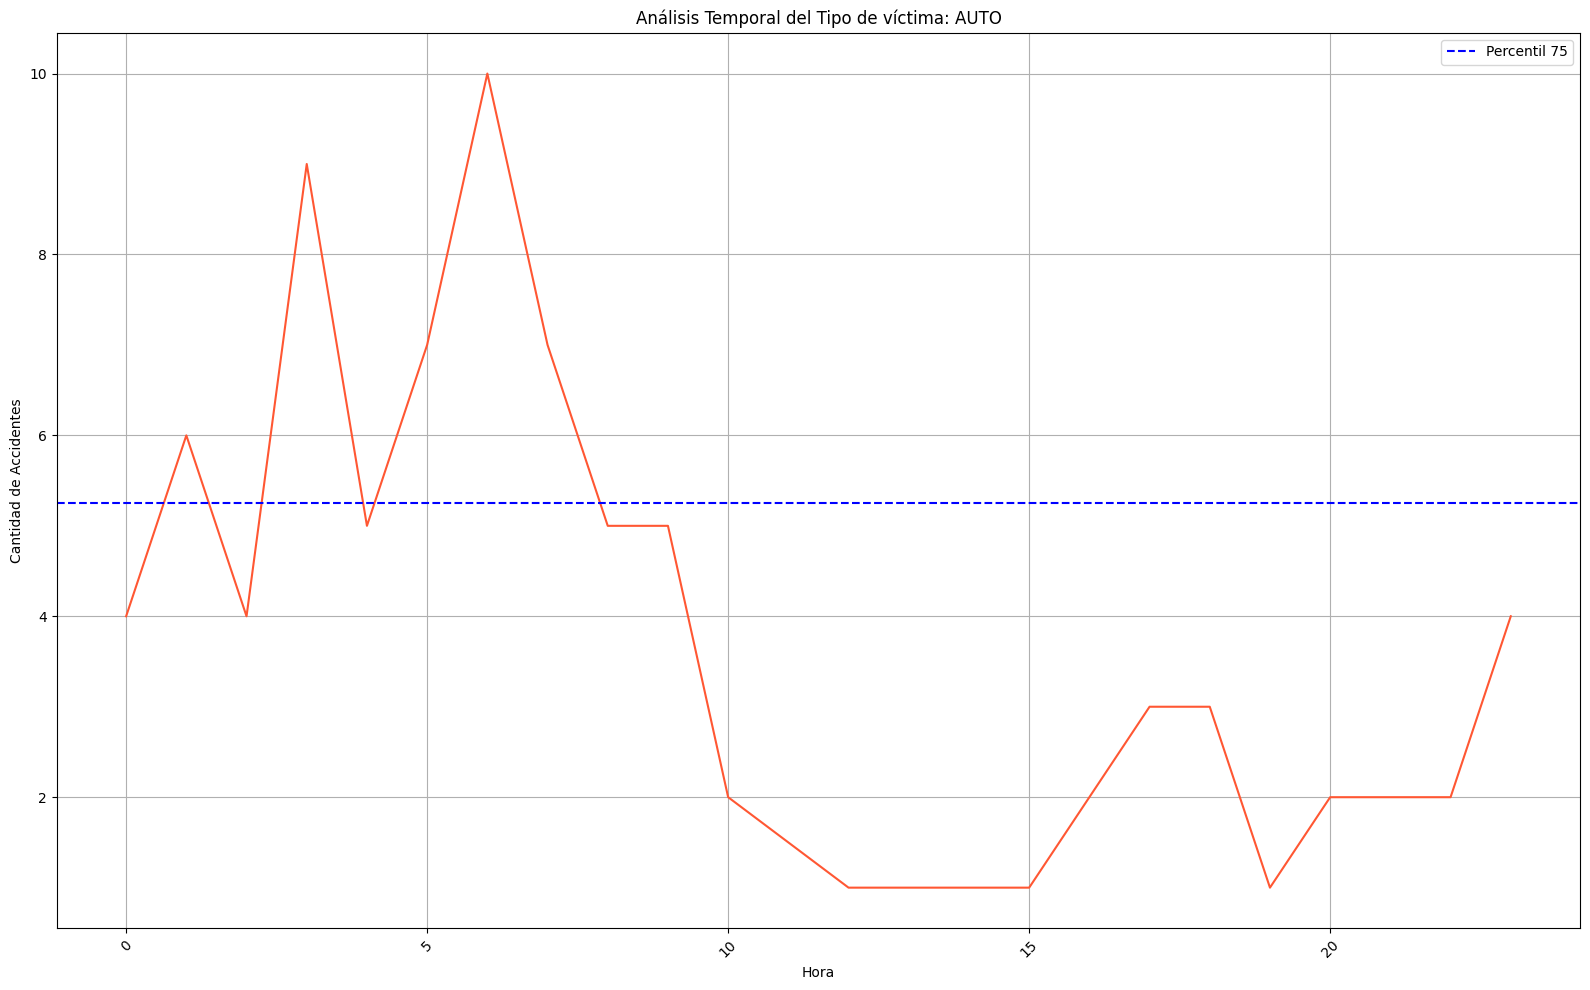

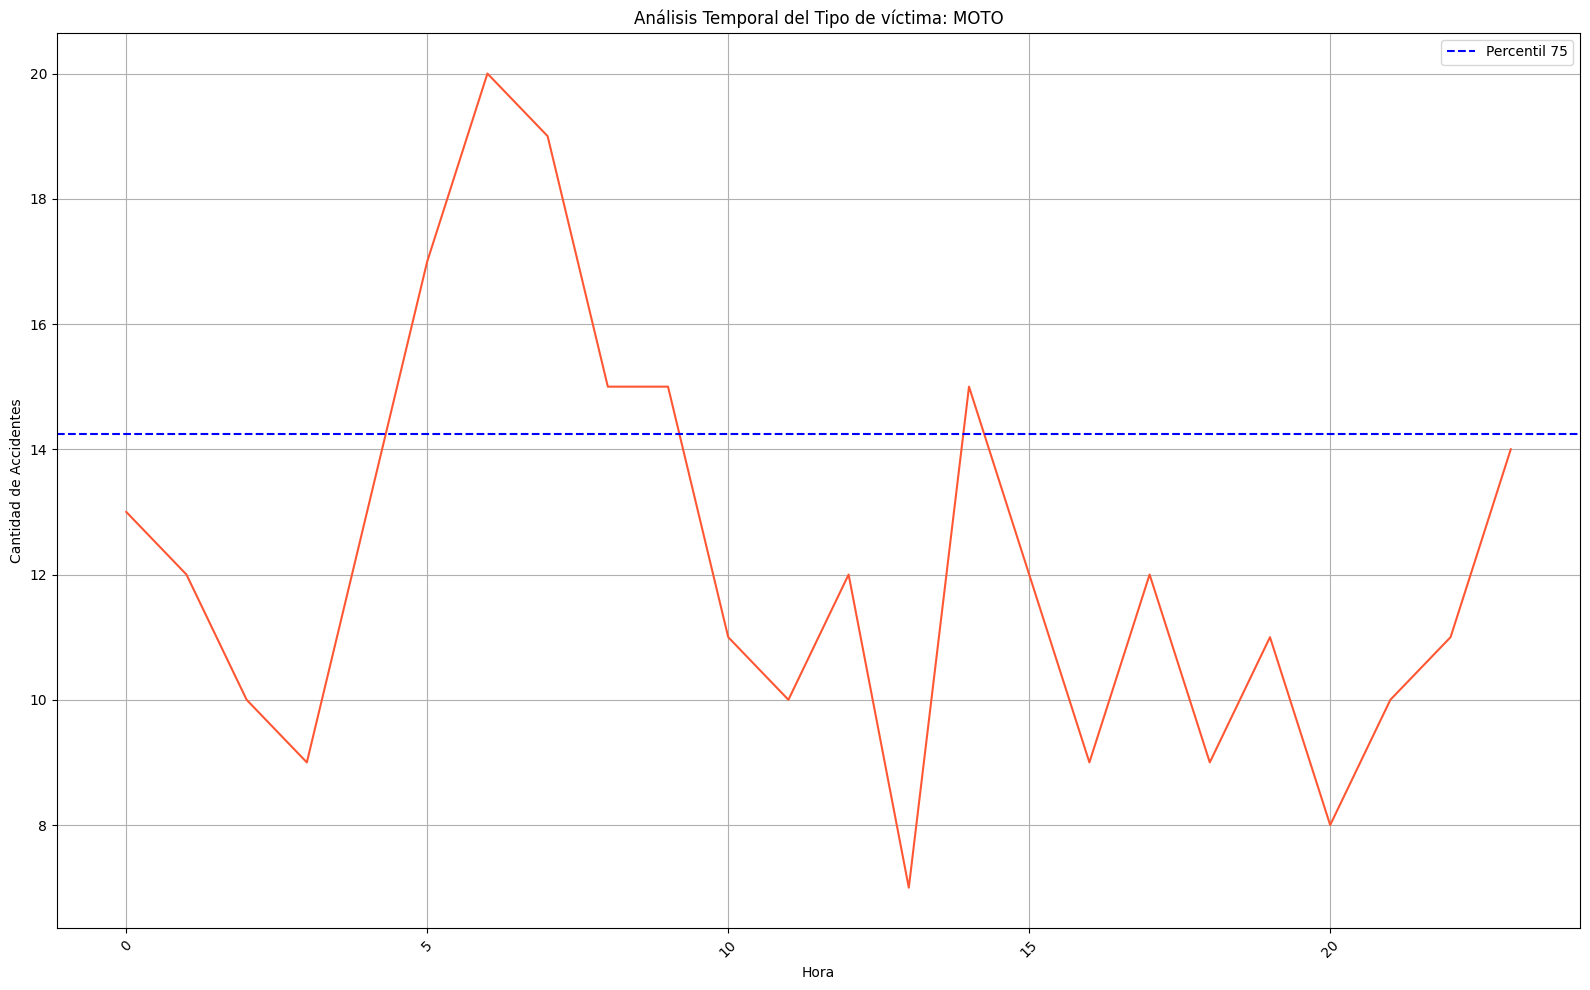

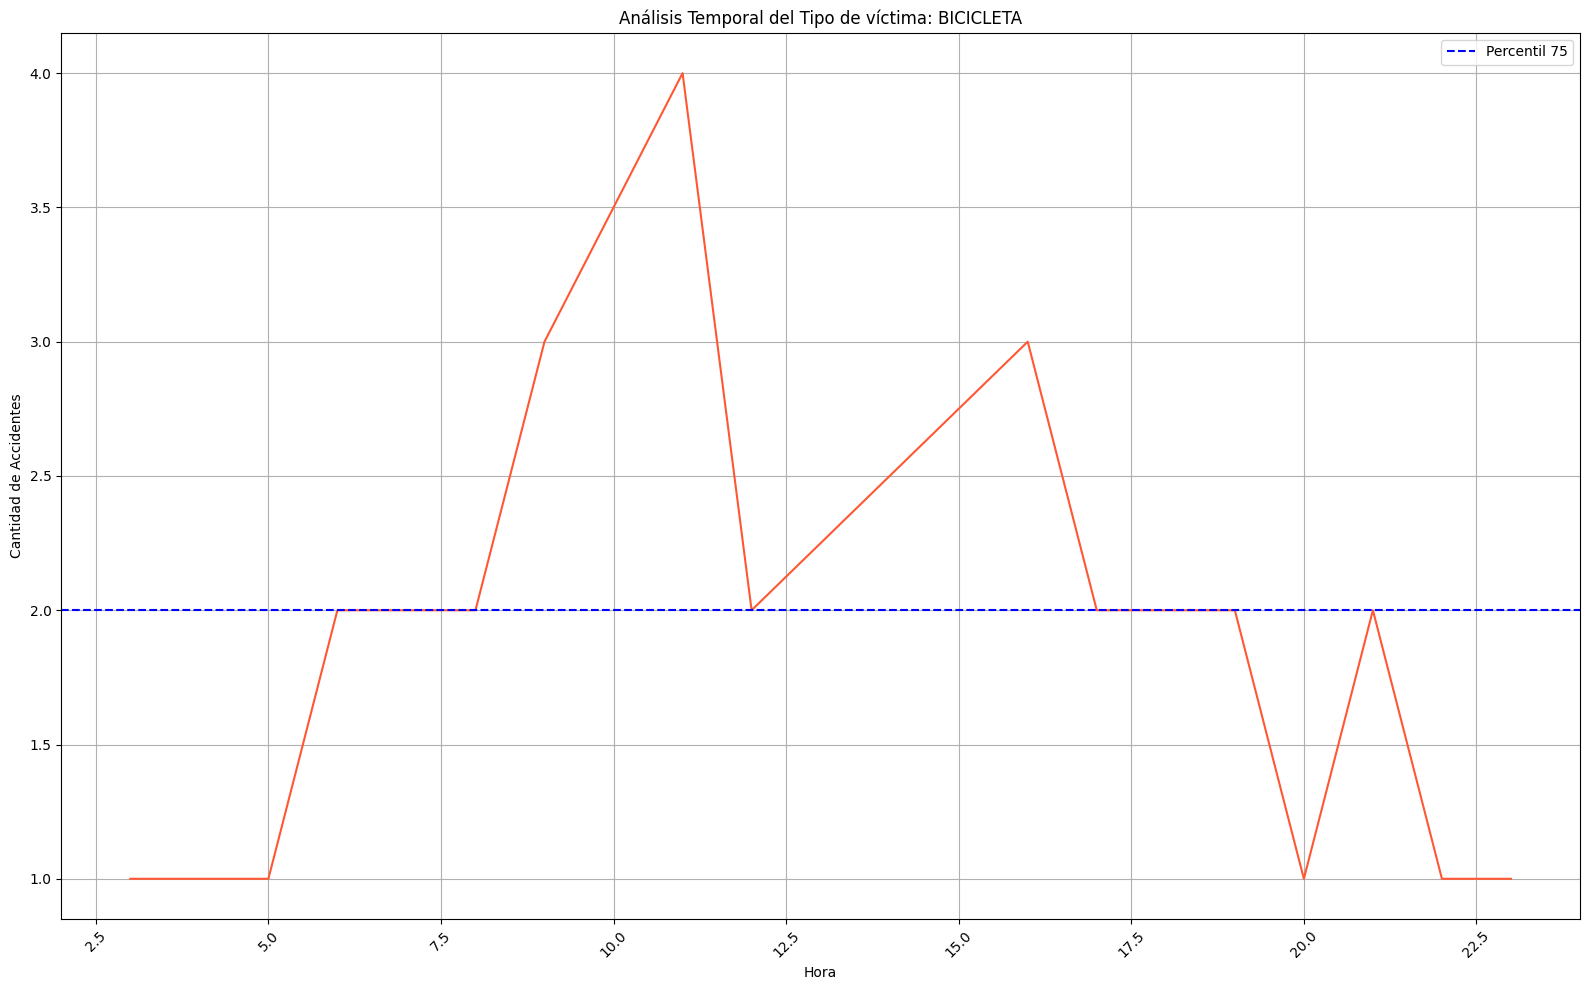

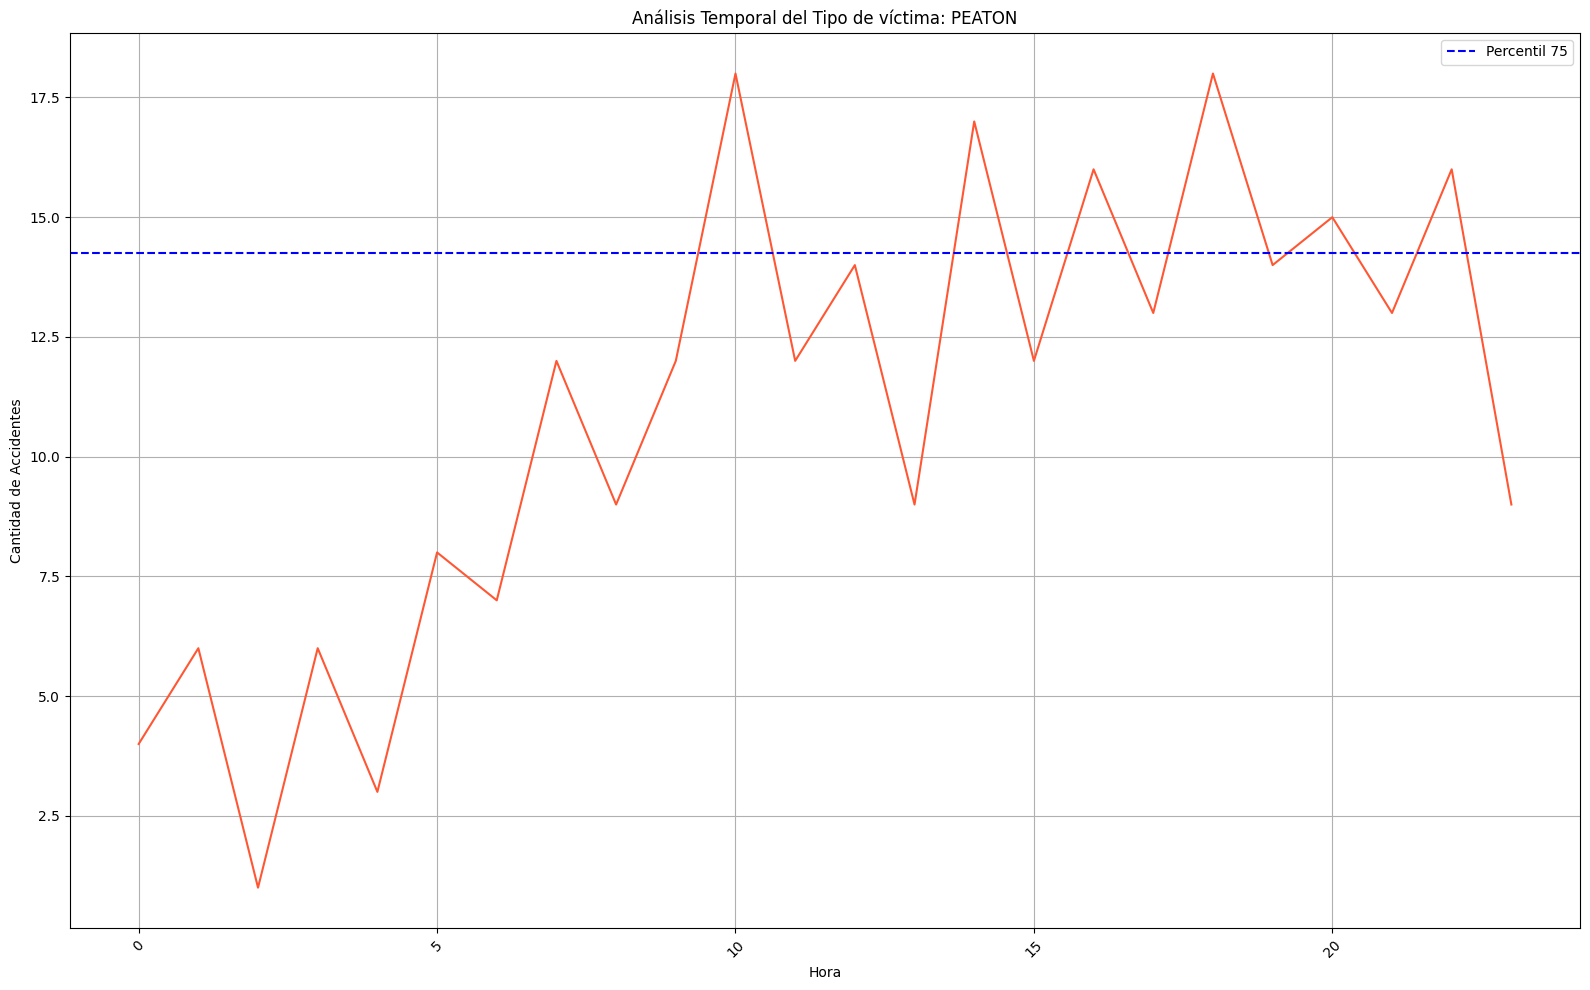

In [151]:
# Filtramos las columnas que nos interesan (AAAA, MM, VICTIMA)
df_victimas_filtrado = df_hechos[['HH', 'VICTIMA']]

# Eliminamos filas con valores nulos en VICTIMA
df_victimas_filtrado = df_victimas_filtrado.dropna(subset=['VICTIMA'])

# Agrupamos por Hora y contamos la cantidad de cada tipo de acusado
df_victimas_agrupado = df_victimas_filtrado.groupby(['HH', 'VICTIMA']).size().reset_index(name='COUNT')

# Filtramos solo los tipos de acusados que nos interesan (AUTO, MOTO, CARGAS, OBJETO-FIJO, PASAJEROS)
tipos_acusado = ['AUTO', 'MOTO', 'BICICLETA', 'PEATON']
df_plot = df_victimas_agrupado[df_victimas_agrupado['VICTIMA'].isin(tipos_acusado)]

# Creamos un gráfico por cada tipo de acusado
for tipo in tipos_acusado:
    df_tipo = df_plot[df_plot['VICTIMA'] == tipo]
    
    # Calcular el percentil 75
    percentil_75 = np.percentile(df_tipo['COUNT'], 75)

    plt.figure(figsize=(16, 10))
    plt.plot(df_tipo['HH'], df_tipo['COUNT'], color='#FF5733')
    
    # Añadir la línea horizontal para el percentil de 75%
    plt.axhline(y=percentil_75, color='blue', linestyle='--', label='Percentil 75')

    # Añadimos etiquetas y título
    plt.xlabel('Hora')
    plt.ylabel('Cantidad de Accidentes')
    plt.title(f'Análisis Temporal del Tipo de víctima: {tipo}')
    plt.xticks(rotation=45)  # Rotamos las etiquetas del eje x para mejor visibilidad
    plt.grid(True)
    
    # Añadimos leyenda
    plt.legend()

    # Mostramos el gráfico
    plt.tight_layout()
    plt.show()

    Aquí va el comentario de las gráficas

### *Distribución del número de víctimas por tipo de víctima en cada comuna*

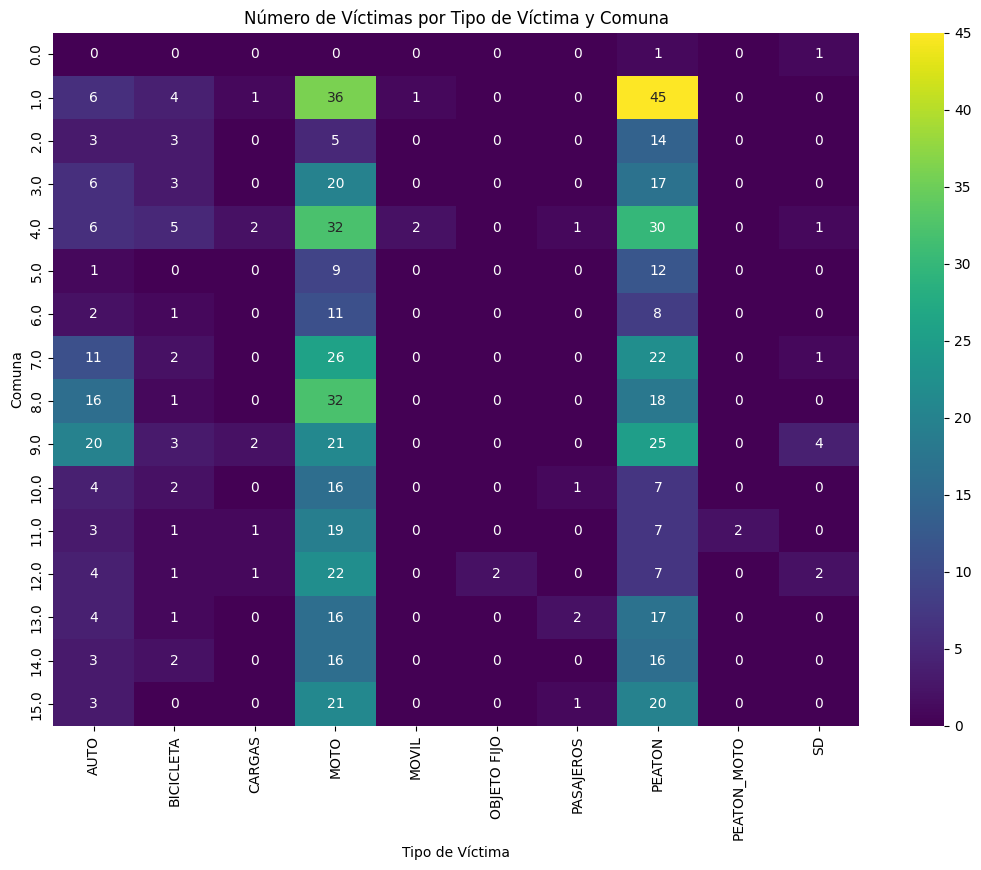

In [153]:
# Crear una tabla pivote para tener los tipos de víctimas como columnas
tabla_pivote_victima = df_hechos.pivot_table(index='COMUNA', columns='VICTIMA', values='N_VICTIMAS', aggfunc='sum', fill_value=0)

# Crear un heatmap
plt.figure(figsize=(13, 9))
sns.heatmap(tabla_pivote_victima, cmap='viridis', annot=True, fmt='d')
plt.title('Número de Víctimas por Tipo de Víctima y Comuna')
plt.xlabel('Tipo de Víctima')
plt.ylabel('Comuna')

# Mostrar el gráfico
plt.show()

    Aquí va el comentario del gráfico

### *Relación entre Víctimas y Acusados*

Comprobación de la columna "PARTICIPANTES" con la unión de "VICTIMA" y "ACUSADO"

In [38]:
# Verifica si los datos en la columna "PARTICIPANTES" coinciden con la unión de "VICTIMA" y "ACUSADO"
coinciden = df_hechos.apply(lambda row: row['VICTIMA'] + '-' + row['ACUSADO'] == row['PARTICIPANTES'], axis=1)

# Verifica si todos los valores son True (coinciden)
todos_coinciden = coinciden.all()

# Muestra el resultado
print(f"¿Todos los datos coinciden?: {todos_coinciden}")

¿Todos los datos coinciden?: False


In [39]:
# Encuentra las filas donde los datos no coinciden
indices_no_coinciden = df_hechos.index[df_hechos['VICTIMA'] + '-' + df_hechos['ACUSADO'] != df_hechos['PARTICIPANTES']].tolist()

# Muestra el resumen
print(f"Los datos no coinciden en las filas con índices: {indices_no_coinciden}")

Los datos no coinciden en las filas con índices: [31, 62, 143, 146, 153, 174, 225, 230, 277, 278, 333, 355, 371, 375, 425, 444, 458, 513, 550, 643, 672]


    Los datos que no coinciden, es debido a que se coloca como multiple en las opción de participante, es por ello que para realizar la gráfica se utilizan las columnas "ACUSADO" y "VICTIMA".

#### Gráfico de barras apiladas

Este nos ayuda a ver la frecuencia de cada combinación de tipo de víctima y tipo de acusado

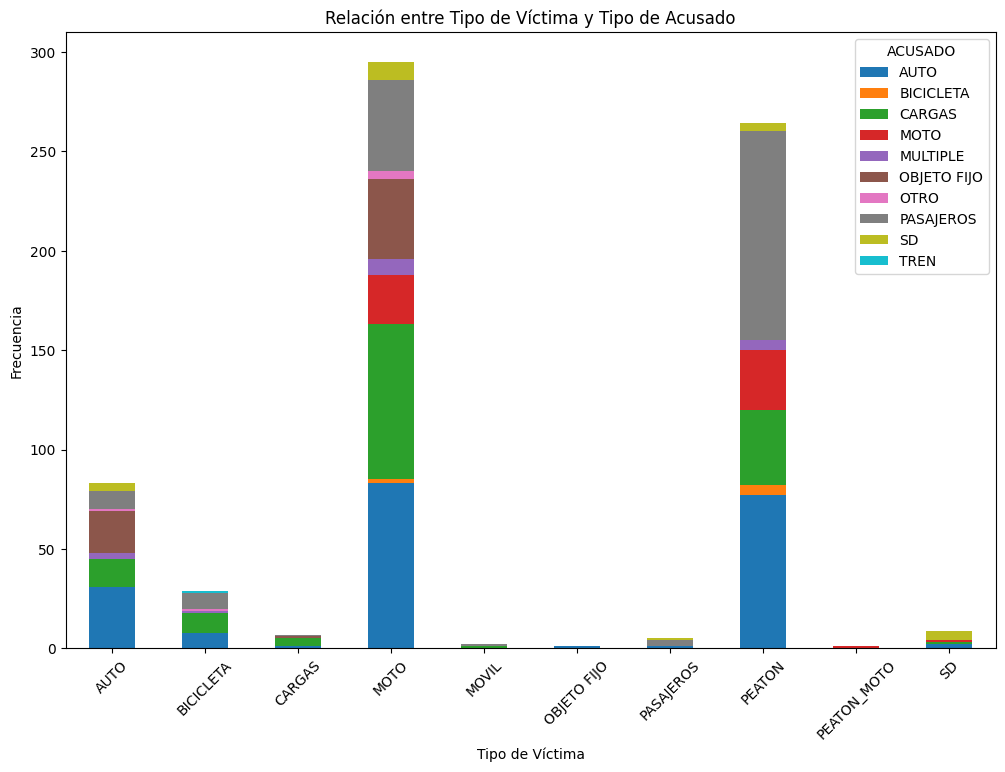

In [162]:
# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(df_hechos['VICTIMA'], df_hechos['ACUSADO'])

# Crear un gráfico de barras apiladas
tabla_contingencia.plot(kind='bar', stacked=True, figsize=(12, 8))

# Modificar la inclinación de los nombres en el eje x
plt.xticks(rotation=45)

plt.title('Relación entre Tipo de Víctima y Tipo de Acusado')
plt.xlabel('Tipo de Víctima')
plt.ylabel('Frecuencia')
plt.show()

#### Matriz de confusión

Esta tabla proporcionará una visión cuantitativa de la relación entre el tipo de víctima y el tipo de acusado.

In [164]:
# Supongamos que 'df_hechos' es tu DataFrame
tabla_contingencia = pd.crosstab(df_hechos['VICTIMA'], df_hechos['ACUSADO'])

# Visualizar la tabla de contingencia
tabla_contingencia

ACUSADO,AUTO,BICICLETA,CARGAS,MOTO,MULTIPLE,OBJETO FIJO,OTRO,PASAJEROS,SD,TREN
VICTIMA,,,,,,,,,,
AUTO,31,0,14,0,3,21,1,9,4,0
BICICLETA,8,0,10,0,1,0,1,8,0,1
CARGAS,1,0,4,0,0,1,0,1,0,0
MOTO,83,2,78,25,8,40,4,46,9,0
MOVIL,0,0,1,0,0,0,0,1,0,0
OBJETO FIJO,1,0,0,0,0,0,0,0,0,0
PASAJEROS,1,0,0,0,0,0,0,3,1,0
PEATON,77,5,38,30,5,0,0,105,4,0
PEATON_MOTO,0,0,0,1,0,0,0,0,0,0


El análisis de la tabla de contingencia revela patrones interesantes en la relación entre el tipo de acusado y el tipo de víctima:

1. **Auto vs. Otros Vehículos:** Se observa que en la mayoría de los casos, cuando el acusado es un "Auto", la víctima también suele ser un vehículo motorizado (Auto, Moto, Cargas). Esto indica que los accidentes entre vehículos son comunes.

2. **Moto vs. Otros Vehículos:** Similar a los autos, cuando el acusado es una "Moto", la víctima suele ser otro vehículo motorizado (Auto, Moto, Cargas). Esto sugiere que los accidentes entre motocicletas y otros vehículos son frecuentes.

3. **Peatón vs. Otros Vehículos:** Cuando el acusado es un "Peatón", las víctimas son principalmente vehículos motorizados (Auto, Moto, Cargas). Esto puede indicar accidentes en los que los peatones son golpeados por vehículos en movimiento.

4. **Peatón vs. Peatón:** Hay un número significativo de casos en los que un peatón es acusado y la víctima también es un peatón. Esto podría representar situaciones de accidentes entre peatones, como atropellos en cruces de calles.

5. **Objeto Fijo vs. Otros Vehículos:** En la mayoría de los casos en los que el acusado es un "Objeto Fijo", la víctima es un vehículo motorizado (Auto, Moto, Cargas). Esto podría indicar colisiones de vehículos con objetos fijos como postes o señales de tráfico.

6. **Otros Tipos de Víctimas:** Para casos menos comunes como "Bicicleta", "Cargas", "Múltiple", "Móvil", y "Tren", se observan diferentes patrones en la relación con el tipo de acusado.

Es importante tener en cuenta que estos patrones pueden proporcionar información valiosa sobre los tipos de accidentes que ocurren con mayor frecuencia y los participantes involucrados. Esto puede ser útil para la implementación de medidas de seguridad y prevención de accidentes. Además, estos hallazgos podrían ser la base para un análisis más detallado y específico sobre cada tipo de accidente.